# Load Libraries

In [403]:
#Importing all the necessary packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats
from scipy.stats import zscore
from scipy.stats import yeojohnson
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder, PowerTransformer
from sklearn.impute import KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay,roc_auc_score, roc_curve 
from sklearn.metrics import classification_report, mean_squared_error, f1_score
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline
from dmba import classificationSummary, AIC_score, BIC_score, plotDecisionTree,gainsChart
from scikitplot.metrics import plot_lift_curve, plot_cumulative_gain
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier 
from sklearn.ensemble import GradientBoostingClassifier
from imblearn.metrics import specificity_score, sensitivity_score
from imblearn.under_sampling import RandomUnderSampler
from tabulate import tabulate
from scikitplot.metrics import plot_lift_curve
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LassoCV, RidgeCV,  LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from sklearn import tree
from sklearn.model_selection import cross_val_score
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load Data

## Un-matched dataset

In [404]:
#Load dataset
pcs = pd.read_csv(r'C:\Users\Halee\Downloads\final_data.csv')
pcs.head()

,participant_type,age,sex,gender,race,ethnicity,racial_stress,nicotine_status,rehab_status,unemployment_covid,...,pcs_diag,duration,tbi_prob,mental,fin_stress,sus_att,cpt_profile,vacc_bi,cardio_bi,promis_score
0,Vet,44,Male,Man,White,Non,3,0,0,Cov,...,Healthy,10,Mod,0,4,1.0,0.0,Before,0,17.0
1,Vet,57,Male,Man,Asian,Non,1,0,0,Emp,...,Healthy,3,None,0,2,2.0,3.0,Before,1,8.0
2,Vet,56,Female,Woman,White,Non,2,0,0,Emp,...,Healthy,10,Mild,2,2,1.0,0.0,Before,1,8.0
3,Vet,50,Male,Man,More,Non,1,1,0,Emp,...,Healthy,87,Mild,1,3,3.0,0.0,Before,0,18.0
4,Vet,51,Male,Man,White,Non,1,0,0,Emp,...,PASC,24,None,0,4,2.0,2.0,After,1,12.0


In [405]:
pcs.shape

(793, 36)

## Matched dataset

In [497]:
# Load matched dataset
pcs_m = pd.read_csv(r'C:\Users\Halee\Downloads\match_data.csv')
pcs_m.head()

,participant_type,age,sex,gender,race,ethnicity,racial_stress,nicotine_status,rehab_status,unemployment_covid,...,pcs_diag,duration,tbi_prob,mental,fin_stress,sus_att,cpt_profile,vacc_bi,cardio_bi,promis_score
0,Vet,44,Male,Man,White,Non,3,0,0,Cov,...,Healthy,10,Mod,0,4,1.0,0.0,Before,0,17
1,Vet,56,Female,Woman,White,Non,2,0,0,Emp,...,Healthy,10,Mild,2,2,1.0,0.0,Before,1,8
2,Vet,50,Male,Man,More,Non,1,1,0,Emp,...,Healthy,87,Mild,1,3,3.0,0.0,Before,0,18
3,Vet,51,Male,Man,White,Non,1,0,0,Emp,...,PASC,24,None,0,4,2.0,2.0,After,1,12
4,Vet,50,Male,Man,White,Non,1,0,0,Emp,...,Healthy,3,Mild,0,2,2.0,3.0,Before,0,8


## Cognitive Data Only

In [642]:
pcs_c = pd.read_csv(r'C:\Users\Halee\Downloads\cog_data2.csv')
pcs_c.head()

,participant_type,age,sex,gender,race,ethnicity,racial_stress,nicotine_status,rehab_status,unemployment_covid,...,rat_m_acc,rat_h_rt_mn,rat_h_rt_sd,rat_h_acc,sus_att,cpt_profile,vacc_bi,cardio_bi,cluster,promis_score
0,Vet,44,Male,Man,White,Non,3,0,0,Cov,...,0.000000,8905.660000,5712.871910,0.000000,1.0,0.0,Before,0,2,17.0
1,Vet,57,Male,Man,Asian,Non,1,0,0,Emp,...,0.500000,112371.000000,152353.481738,0.333333,2.0,3.0,Before,1,4,8.0
2,Vet,56,Female,Woman,White,Non,2,0,0,Emp,...,0.666667,6677.633333,1230.960244,0.333333,1.0,0.0,Before,1,4,8.0
3,Vet,50,Male,Man,More,Non,1,1,0,Emp,...,0.333333,9334.533333,6190.750328,0.000000,3.0,0.0,Before,0,4,18.0
4,Vet,51,Male,Man,White,Non,1,0,0,Emp,...,0.400000,33344.500000,33970.473297,0.333333,2.0,2.0,After,1,5,12.0


# Verify dataframe info

In [408]:
pcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_type       793 non-null    object 
 1   age                    793 non-null    int64  
 2   sex                    793 non-null    object 
 3   gender                 793 non-null    object 
 4   race                   793 non-null    object 
 5   ethnicity              793 non-null    object 
 6   racial_stress          793 non-null    int64  
 7   nicotine_status        793 non-null    int64  
 8   rehab_status           793 non-null    int64  
 9   unemployment_covid     793 non-null    object 
 10  global_qol_scale       793 non-null    int64  
 11  vaccine_menstrual      793 non-null    object 
 12  med_access             793 non-null    int64  
 13  initial_symptom_score  793 non-null    int64  
 14  pre_pandemic           793 non-null    int64  
 15  hit6_s

In [409]:
pcs_m.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_type       298 non-null    object 
 1   age                    298 non-null    int64  
 2   sex                    298 non-null    object 
 3   gender                 298 non-null    object 
 4   race                   298 non-null    object 
 5   ethnicity              298 non-null    object 
 6   racial_stress          298 non-null    int64  
 7   nicotine_status        298 non-null    int64  
 8   rehab_status           298 non-null    int64  
 9   unemployment_covid     298 non-null    object 
 10  global_qol_scale       298 non-null    int64  
 11  vaccine_menstrual      298 non-null    object 
 12  med_access             298 non-null    int64  
 13  initial_symptom_score  298 non-null    int64  
 14  pre_pandemic           298 non-null    int64  
 15  hit6_s

In [410]:
pcs_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 46 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datediff      789 non-null    float64
 1   pcs_diag      789 non-null    object 
 2   vs_a_rt_mn_s  793 non-null    float64
 3   vs_a_rt_sd_s  793 non-null    float64
 4   vs_a_acc_s    793 non-null    float64
 5   vs_p_rt_mn_s  793 non-null    float64
 6   vs_p_rt_sd_s  793 non-null    float64
 7   vs_p_acc_s    793 non-null    float64
 8   vs_a_rt_mn_l  793 non-null    float64
 9   vs_a_rt_sd_l  793 non-null    float64
 10  vs_a_acc_l    793 non-null    float64
 11  vs_p_rt_mn_l  793 non-null    float64
 12  vs_p_rt_sd_l  793 non-null    float64
 13  vs_p_acc_l    793 non-null    float64
 14  f_c_rt_mn     792 non-null    float64
 15  f_c_rt_sd     792 non-null    float64
 16  f_c_acc       792 non-null    float64
 17  f_i_rt_mn     792 non-null    float64
 18  f_i_rt_sd     792 non-null    

# Verify Outcome Variable Proportions

In [411]:
pcs['pcs_diag'].value_counts()

Healthy    511
PASC       278
Name: pcs_diag, dtype: int64

# Udpate data types

In [412]:
pcs['gender'] = pcs['gender'].astype('category')
pcs['race'] = pcs['race'].astype('category')
pcs['ethnicity'] = pcs['ethnicity'].astype('category')
pcs['unemployment_covid'] = pcs['unemployment_covid'].astype('category')
pcs['pcs_diag'] = pcs['pcs_diag'].astype('category')
pcs['tbi_prob'] = pcs['tbi_prob'].astype('category')
pcs['vacc_bi'] = pcs['vacc_bi'].astype('category')
pcs['nicotine_status'] = pcs['nicotine_status'].astype('category')
pcs['rehab_status'] = pcs['rehab_status'].astype('category')
pcs['cardio_bi'] = pcs['cardio_bi'].astype('category')
pcs['cpt_profile'] = pcs['cpt_profile'].astype('category')
pcs['participant_type'] = pcs['participant_type'].astype('category')
pcs['vaccine_menstrual'] = pcs['vaccine_menstrual'].astype('category')
pcs['med_access'] = pcs['med_access'].astype('category')


In [413]:
pcs_m['gender'] = pcs_m['gender'].astype('category')
pcs_m['race'] = pcs_m['race'].astype('category')
pcs_m['ethnicity'] = pcs_m['ethnicity'].astype('category')
pcs_m['unemployment_covid'] = pcs_m['unemployment_covid'].astype('category')
pcs_m['pcs_diag'] = pcs_m['pcs_diag'].astype('category')
pcs_m['tbi_prob'] = pcs_m['tbi_prob'].astype('category')
pcs_m['vacc_bi'] = pcs_m['vacc_bi'].astype('category')
pcs_m['nicotine_status'] = pcs_m['nicotine_status'].astype('category')
pcs_m['rehab_status'] = pcs_m['rehab_status'].astype('category')
pcs_m['cardio_bi'] = pcs_m['cardio_bi'].astype('category')
pcs_m['cpt_profile'] = pcs_m['cpt_profile'].astype('category')
pcs_m['participant_type'] = pcs_m['participant_type'].astype('category')
pcs_m['vaccine_menstrual'] = pcs_m['vaccine_menstrual'].astype('category')
pcs_m['med_access'] = pcs_m['med_access'].astype('category')


In [414]:
pcs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   participant_type       793 non-null    category
 1   age                    793 non-null    int64   
 2   sex                    793 non-null    object  
 3   gender                 793 non-null    category
 4   race                   793 non-null    category
 5   ethnicity              793 non-null    category
 6   racial_stress          793 non-null    int64   
 7   nicotine_status        793 non-null    category
 8   rehab_status           793 non-null    category
 9   unemployment_covid     793 non-null    category
 10  global_qol_scale       793 non-null    int64   
 11  vaccine_menstrual      793 non-null    category
 12  med_access             793 non-null    category
 13  initial_symptom_score  793 non-null    int64   
 14  pre_pandemic           793 non-null    int

# Define numerical and categorical variables

In [415]:
cats = ['cpt_profile', 'participant_type',
        'gender', 'race', 'ethnicity', 
        'nicotine_status', 'rehab_status', 
        'unemployment_covid', 'vaccine_menstrual',
        'tbi_prob', 'vacc_bi', 'cardio_bi',
        'med_access']
nums = ['age',
        'global_qol_scale', 
        'initial_symptom_score', 
        'pre_pandemic',
        'promis_score', 
        'hit6_score', 
        'fatigue_score',
        'gad7_tot_score', 
        'phq9_total', 
        'pss_overall_score', 
        'social_support_score', 
        'dvprs_score', 
        'dyspnoea_12_score', 
        'BMI', 
        'duration', 
        'psqi_glob', 
        'mental', 
        'racial_stress', 
        'fin_stress',
        'datediff',
        'sus_att'] 
all_vars = cats+nums

# Create Transformation Pipeline

In [416]:
# Create a categorical processing pipeline that uses one-hot encoding, dropping binary columns.
cat_pipe = Pipeline([('encoder', OneHotEncoder(drop='if_binary'))])
# Create a numerical processing pipeline that uses skewness correction/center/scale.
num_pipe = Pipeline([('skew_standardize', PowerTransformer())])

# Combine pipeline steps
all_pipe = make_pipeline(ColumnTransformer([('cat', cat_pipe, cats), 
                                            ('num', num_pipe, nums)],
                                          verbose_feature_names_out=False))
# Verify steps
all_pipe.named_steps

{'columntransformer': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('encoder',
                                                   OneHotEncoder(drop='if_binary'))]),
                                  ['cpt_profile', 'participant_type', 'gender',
                                   'race', 'ethnicity', 'nicotine_status',
                                   'rehab_status', 'unemployment_covid',
                                   'vaccine_menstrual', 'tbi_prob', 'vacc_bi',
                                   'cardio_bi', 'med_access']),
                                 ('num',
                                  Pipeline(steps=[('skew_standardize',
                                                   PowerTransformer())]),
                                  ['age', 'global_qol_scale',
                                   'initial_symptom_score', 'pre_pandemic',
                                   'promis_score', 'hit6_score', 'fatigue_score',
            

# Split Data into Training and Test Sets for Predictive Model

In [417]:
# Split the data into features (X) and the binary target variable (y).
X = pcs[all_vars]

#Make outcome variable into binary variable
pcs['pcs_diag'] = pcs['pcs_diag'].apply(lambda x: 1 if x == 'PASC' else 0)

#Define outcome variable
y = pcs[['pcs_diag']]


#Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state=1)

In [418]:
#Confirm stratified split
y_train.value_counts()/len(y_train)

pcs_diag
0           0.654054
1           0.340541
dtype: float64

In [419]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 341 to 37
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pcs_diag  552 non-null    category
dtypes: category(1)
memory usage: 5.0 KB


In [420]:
X_train.head()

,cpt_profile,participant_type,gender,race,ethnicity,nicotine_status,rehab_status,unemployment_covid,vaccine_menstrual,tbi_prob,...,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress,datediff,sus_att
341,0.0,Civ,Woman,White,Non,0,0,Emp,No/NA,None,...,26,27,32.8,12,16.0,1,2,4,159.4,2.0
172,3.0,Vet,Man,White,Non,1,0,Emp,No/NA,None,...,0,6,21.0,19,12.0,3,1,6,148.4,3.0
399,0.0,Civ,Woman,Asian,Non,0,0,Emp,No/NA,None,...,0,0,27.6,20,4.0,0,1,2,4.3,2.0
481,NaN,Civ,NonBi,White,Non,0,0,Emp,No/NA,None,...,2,1,44.3,7,8.0,0,2,4,32.1,NaN
103,3.0,Civ,Woman,White,Non,1,0,Emp,No/NA,None,...,0,2,30.8,4,14.0,0,2,4,74.1,1.0


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'global_qol_scale'}>,
        <AxesSubplot:title={'center':'initial_symptom_score'}>,
        <AxesSubplot:title={'center':'pre_pandemic'}>,
        <AxesSubplot:title={'center':'promis_score'}>],
       [<AxesSubplot:title={'center':'hit6_score'}>,
        <AxesSubplot:title={'center':'fatigue_score'}>,
        <AxesSubplot:title={'center':'gad7_tot_score'}>,
        <AxesSubplot:title={'center':'phq9_total'}>,
        <AxesSubplot:title={'center':'pss_overall_score'}>],
       [<AxesSubplot:title={'center':'social_support_score'}>,
        <AxesSubplot:title={'center':'dvprs_score'}>,
        <AxesSubplot:title={'center':'dyspnoea_12_score'}>,
        <AxesSubplot:title={'center':'BMI'}>,
        <AxesSubplot:title={'center':'duration'}>],
       [<AxesSubplot:title={'center':'psqi_glob'}>,
        <AxesSubplot:title={'center':'mental'}>,
        <AxesSubplot:title={'center':'racial_stress'}>,
        

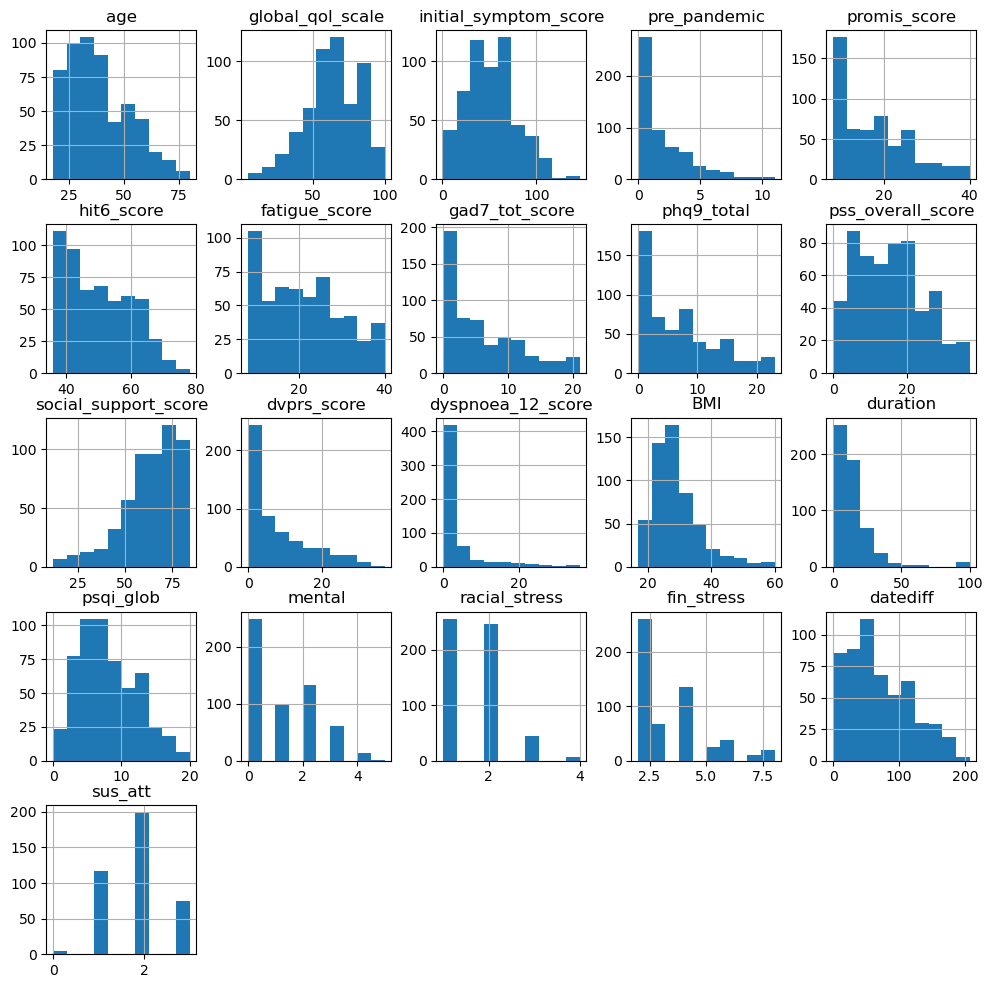

In [421]:
X_train.hist(figsize = (12,12))

In [422]:
X_train.describe()

,age,global_qol_scale,initial_symptom_score,pre_pandemic,promis_score,hit6_score,fatigue_score,gad7_tot_score,phq9_total,pss_overall_score,...,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress,datediff,sus_att
count,555.000000,555.000000,555.000000,555.000000,554.000000,555.000000,555.000000,555.000000,555.000000,555.000000,...,555.000000,555.000000,548.000000,555.000000,552.000000,555.000000,555.000000,555.000000,552.000000,395.000000
mean,38.801802,64.306306,51.918919,2.120721,17.552347,50.163964,20.945946,6.028829,6.852252,15.490090,...,7.807207,3.140541,28.833394,13.927928,7.452899,1.088288,1.645045,3.311712,70.744565,1.873418
std,13.556021,19.360625,26.406273,2.162576,8.408747,9.858391,9.125121,5.644002,6.205838,8.913007,...,8.760797,6.164273,7.503454,14.030982,4.166406,1.167145,0.683844,1.602724,47.006989,0.715440
min,18.000000,5.000000,1.000000,0.000000,8.000000,36.000000,8.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,17.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
25%,28.000000,55.000000,32.000000,0.000000,10.000000,42.000000,13.000000,1.000000,1.000000,8.000000,...,0.000000,0.000000,23.700000,7.000000,4.000000,0.000000,1.000000,2.000000,32.850000,1.000000
50%,36.000000,70.000000,51.000000,2.000000,16.000000,49.000000,20.000000,5.000000,5.000000,15.000000,...,5.000000,0.000000,27.400000,10.000000,7.000000,1.000000,2.000000,3.000000,60.350000,2.000000
75%,48.500000,80.000000,68.000000,3.000000,23.000000,58.000000,28.000000,10.000000,11.000000,22.000000,...,13.000000,3.000000,32.200000,16.000000,10.000000,2.000000,2.000000,4.000000,104.950000,2.000000
max,80.000000,100.000000,146.000000,11.000000,40.000000,78.000000,40.000000,21.000000,23.000000,37.000000,...,37.000000,36.000000,60.000000,100.000000,20.000000,5.000000,4.000000,8.000000,206.400000,3.000000


# Impute missing values

In [423]:
X_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_train), 
                           columns = X_train.columns.to_list())
X_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_test),
                         columns = X_test.columns.to_list())

In [424]:
X_train_imp.head()

,cpt_profile,participant_type,gender,race,ethnicity,nicotine_status,rehab_status,unemployment_covid,vaccine_menstrual,tbi_prob,...,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress,datediff,sus_att
0,0.0,Civ,Woman,White,Non,0,0,Emp,No/NA,None,...,26,27,32.8,12,16.0,1,2,4,159.4,2.0
1,3.0,Vet,Man,White,Non,1,0,Emp,No/NA,None,...,0,6,21.0,19,12.0,3,1,6,148.4,3.0
2,0.0,Civ,Woman,Asian,Non,0,0,Emp,No/NA,None,...,0,0,27.6,20,4.0,0,1,2,4.3,2.0
3,0.0,Civ,NonBi,White,Non,0,0,Emp,No/NA,None,...,2,1,44.3,7,8.0,0,2,4,32.1,2.0
4,3.0,Civ,Woman,White,Non,1,0,Emp,No/NA,None,...,0,2,30.8,4,14.0,0,2,4,74.1,1.0


In [425]:
X_train_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cpt_profile            555 non-null    object
 1   participant_type       555 non-null    object
 2   gender                 555 non-null    object
 3   race                   555 non-null    object
 4   ethnicity              555 non-null    object
 5   nicotine_status        555 non-null    object
 6   rehab_status           555 non-null    object
 7   unemployment_covid     555 non-null    object
 8   vaccine_menstrual      555 non-null    object
 9   tbi_prob               555 non-null    object
 10  vacc_bi                555 non-null    object
 11  cardio_bi              555 non-null    object
 12  med_access             555 non-null    object
 13  age                    555 non-null    object
 14  global_qol_scale       555 non-null    object
 15  initial_symptom_score  

In [426]:
#update data types
X_train_imp['gender'] = X_train_imp['gender'].astype('category')
X_train_imp['race'] = X_train_imp['race'].astype('category')
X_train_imp['ethnicity'] = X_train_imp['ethnicity'].astype('category')
X_train_imp['unemployment_covid'] = X_train_imp['unemployment_covid'].astype('category')
X_train_imp['tbi_prob'] = X_train_imp['tbi_prob'].astype('category')
X_train_imp['vacc_bi'] = X_train_imp['vacc_bi'].astype('category')
X_train_imp['nicotine_status'] = X_train_imp['nicotine_status'].astype('category')
X_train_imp['rehab_status'] = X_train_imp['rehab_status'].astype('category')
X_train_imp['cardio_bi'] = X_train_imp['cardio_bi'].astype('category')
X_train_imp['cpt_profile'] = X_train_imp['cpt_profile'].astype('category')
X_train_imp['sus_att'] = X_train_imp['sus_att'].astype('category')
X_train_imp['participant_type'] = X_train_imp['participant_type'].astype('category')
X_train_imp['vaccine_menstrual'] = X_train_imp['vaccine_menstrual'].astype('category')
X_train_imp['med_access'] = X_train_imp['med_access'].astype('category')

X_train_imp['age'] = X_train_imp['age'].astype('int64')
X_train_imp['global_qol_scale'] = X_train_imp['global_qol_scale'].astype('int64')
X_train_imp['initial_symptom_score'] = X_train_imp['initial_symptom_score'].astype('int64')
X_train_imp['pre_pandemic'] = X_train_imp['pre_pandemic'].astype('int64')
X_train_imp['promis_score'] = X_train_imp['promis_score'].astype('int64')
X_train_imp['hit6_score'] = X_train_imp['hit6_score'].astype('int64')
X_train_imp['fatigue_score'] = X_train_imp['fatigue_score'].astype('int64')
X_train_imp['gad7_tot_score'] = X_train_imp['gad7_tot_score'].astype('int64')
X_train_imp['phq9_total'] = X_train_imp['phq9_total'].astype('int64')
X_train_imp['pss_overall_score'] = X_train_imp['pss_overall_score'].astype('int64')
X_train_imp['social_support_score'] = X_train_imp['social_support_score'].astype('int64')
X_train_imp['dvprs_score'] = X_train_imp['dvprs_score'].astype('int64')
X_train_imp['dyspnoea_12_score'] = X_train_imp['dyspnoea_12_score'].astype('int64')
X_train_imp['BMI'] = X_train_imp['BMI'].astype('int64')
X_train_imp['duration'] = X_train_imp['duration'].astype('int64')
X_train_imp['psqi_glob'] = X_train_imp['psqi_glob'].astype('int64')
X_train_imp['mental'] = X_train_imp['mental'].astype('int64')
X_train_imp['racial_stress'] = X_train_imp['racial_stress'].astype('int64')
X_train_imp['fin_stress'] = X_train_imp['fin_stress'].astype('int64')
X_train_imp['datediff'] = X_train_imp['datediff'].astype('int64')
X_train_imp['sus_att'] = X_train_imp['sus_att'].astype('int64')

In [427]:
X_test_imp.head()

,cpt_profile,participant_type,gender,race,ethnicity,nicotine_status,rehab_status,unemployment_covid,vaccine_menstrual,tbi_prob,...,dvprs_score,dyspnoea_12_score,BMI,duration,psqi_glob,mental,racial_stress,fin_stress,datediff,sus_att
0,3.0,Vet,Woman,White,Non,0,0,Unemp,No/NA,None,...,21,0,30.0,5,11.0,3,1,3,33.3,2.0
1,0.0,Civ,Man,White,Non,1,0,Emp,No/NA,Mild,...,0,0,25.5,8,12.0,2,1,2,55.6,2.0
2,0.0,Civ,Woman,More,His/LatX,1,0,Emp,No/NA,None,...,9,0,24.8,10,7.0,1,2,2,40.0,2.0
3,0.0,Civ,Woman,White,Non,1,0,Emp,No/NA,None,...,5,0,33.9,2,4.0,3,1,2,80.1,2.0
4,0.0,Civ,Woman,White,Non,1,0,Unemp,No/NA,Mild,...,4,2,40.7,14,3.0,1,1,4,42.4,2.0


In [428]:
X_test_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   cpt_profile            238 non-null    object
 1   participant_type       238 non-null    object
 2   gender                 238 non-null    object
 3   race                   238 non-null    object
 4   ethnicity              238 non-null    object
 5   nicotine_status        238 non-null    object
 6   rehab_status           238 non-null    object
 7   unemployment_covid     238 non-null    object
 8   vaccine_menstrual      238 non-null    object
 9   tbi_prob               238 non-null    object
 10  vacc_bi                238 non-null    object
 11  cardio_bi              238 non-null    object
 12  med_access             238 non-null    object
 13  age                    238 non-null    object
 14  global_qol_scale       238 non-null    object
 15  initial_symptom_score  

In [429]:
#update data types
X_test_imp['gender'] = X_test_imp['gender'].astype('category')
X_test_imp['race'] = X_test_imp['race'].astype('category')
X_test_imp['ethnicity'] = X_test_imp['ethnicity'].astype('category')
X_test_imp['unemployment_covid'] = X_test_imp['unemployment_covid'].astype('category')
X_test_imp['tbi_prob'] = X_test_imp['tbi_prob'].astype('category')
X_test_imp['vacc_bi'] = X_test_imp['vacc_bi'].astype('category')
X_test_imp['nicotine_status'] = X_test_imp['nicotine_status'].astype('category')
X_test_imp['rehab_status'] = X_test_imp['rehab_status'].astype('category')
X_test_imp['cardio_bi'] = X_test_imp['cardio_bi'].astype('category')
X_test_imp['cpt_profile'] = X_test_imp['cpt_profile'].astype('category')
X_test_imp['sus_att'] = X_test_imp['sus_att'].astype('category')
X_test_imp['participant_type'] = X_test_imp['participant_type'].astype('category')
X_test_imp['vaccine_menstrual'] = X_test_imp['vaccine_menstrual'].astype('category')
X_test_imp['med_access'] = X_test_imp['med_access'].astype('category')

X_test_imp['age'] = X_test_imp['age'].astype('int64')
X_test_imp['global_qol_scale'] = X_test_imp['global_qol_scale'].astype('int64')
X_test_imp['initial_symptom_score'] = X_test_imp['initial_symptom_score'].astype('int64')
X_test_imp['pre_pandemic'] = X_test_imp['pre_pandemic'].astype('int64')
X_test_imp['promis_score'] = X_test_imp['promis_score'].astype('int64')
X_test_imp['hit6_score'] = X_test_imp['hit6_score'].astype('int64')
X_test_imp['fatigue_score'] = X_test_imp['fatigue_score'].astype('int64')
X_test_imp['gad7_tot_score'] = X_test_imp['gad7_tot_score'].astype('int64')
X_test_imp['phq9_total'] = X_test_imp['phq9_total'].astype('int64')
X_test_imp['pss_overall_score'] = X_test_imp['pss_overall_score'].astype('int64')
X_test_imp['social_support_score'] = X_test_imp['social_support_score'].astype('int64')
X_test_imp['dvprs_score'] = X_test_imp['dvprs_score'].astype('int64')
X_test_imp['dyspnoea_12_score'] = X_test_imp['dyspnoea_12_score'].astype('int64')
X_test_imp['BMI'] = X_test_imp['BMI'].astype('int64')
X_test_imp['duration'] = X_test_imp['duration'].astype('int64')
X_test_imp['psqi_glob'] = X_test_imp['psqi_glob'].astype('int64')
X_test_imp['mental'] = X_test_imp['mental'].astype('int64')
X_test_imp['racial_stress'] = X_test_imp['racial_stress'].astype('int64')
X_test_imp['fin_stress'] = X_test_imp['fin_stress'].astype('int64')
X_test_imp['datediff'] = X_test_imp['datediff'].astype('int64')
X_test_imp['sus_att'] = X_test_imp['sus_att'].astype('int64')


# Transform Data with Pipeline

In [430]:
#Fit pipeline to resampled data
X_train_fit = all_pipe.fit(X_train_imp)
#Get feature names out from fit and create as new list
X_train_cols = X_train_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_train_pipe = pd.DataFrame(all_pipe.fit_transform(X_train_imp), columns = X_train_cols)

In [431]:
X_train_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555 entries, 0 to 554
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cpt_profile_0.0           555 non-null    float64
 1   cpt_profile_1.0           555 non-null    float64
 2   cpt_profile_2.0           555 non-null    float64
 3   cpt_profile_3.0           555 non-null    float64
 4   participant_type_Vet      555 non-null    float64
 5   gender_Man                555 non-null    float64
 6   gender_NonBi              555 non-null    float64
 7   gender_Trans              555 non-null    float64
 8   gender_Woman              555 non-null    float64
 9   race_Asian                555 non-null    float64
 10  race_Black                555 non-null    float64
 11  race_HI/PI/AL/Oth         555 non-null    float64
 12  race_More                 555 non-null    float64
 13  race_White                555 non-null    float64
 14  ethnicity_

In [432]:
#Create new dataframe with transformed testing data, and apply feature name list as column names
#Fit pipeline to resampled data
X_test_fit = all_pipe.fit(X_test_imp)
#Get feature names out from fit and create as new list
X_test_cols = X_test_fit.get_feature_names_out().tolist()
X_test_pipe = pd.DataFrame(all_pipe.fit_transform(X_test_imp), columns = X_test_cols)

In [433]:
X_test_pipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 238 entries, 0 to 237
Data columns (total 51 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   cpt_profile_0.0           238 non-null    float64
 1   cpt_profile_1.0           238 non-null    float64
 2   cpt_profile_2.0           238 non-null    float64
 3   cpt_profile_3.0           238 non-null    float64
 4   participant_type_Vet      238 non-null    float64
 5   gender_Man                238 non-null    float64
 6   gender_NonBi              238 non-null    float64
 7   gender_Trans              238 non-null    float64
 8   gender_Woman              238 non-null    float64
 9   race_Asian                238 non-null    float64
 10  race_Black                238 non-null    float64
 11  race_HI/PI/AL/Oth         238 non-null    float64
 12  race_More                 238 non-null    float64
 13  race_White                238 non-null    float64
 14  ethnicity_

In [434]:
# Display the shapes of different datasets to check their dimensions
X_train_pipe.shape, X_test_pipe.shape

((555, 51), (238, 51))

# Impute Missing PASC Diagnosis

In [435]:
y_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_train), 
                           columns = y_train.columns.to_list())
y_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_test), 
                           columns = y_test.columns.to_list())

## Rebalance training set for 50/50 class proportion

In [436]:
# Create a RandomUnderSampler instance with a specified random seed and sampling strategy
rus = RandomUnderSampler(random_state = 1, sampling_strategy='majority')

# Perform random under-sampling on the training dataset
X_train_under, y_train_under = rus.fit_resample(X_train_pipe, y_train_imp)

In [437]:
# Check proportions 
y_train_under.value_counts()

pcs_diag
0.0         189
1.0         189
dtype: int64

## Remove C-1 dummies for logistic regression classifier

In [438]:
# Remove specific columns from the datasets
X_train_log = X_train_under.drop(['cpt_profile_0.0', 'gender_Man', 'race_Asian', 'unemployment_covid_Cov',
                                 'tbi_prob_None', 'vacc_bi_None'], axis = 1)
X_test_log = X_test_pipe.drop(['cpt_profile_0.0', 'gender_Man', 'race_Asian', 'unemployment_covid_Cov',
                                 'tbi_prob_None', 'vacc_bi_None'], axis = 1)

# Predictive Model Training

## Logistic Regression with L2 Penalty

In [439]:
# Create Logistic Regression model with L2 regularization
log_l2_bal = LogisticRegressionCV(solver = 'lbfgs', cv = 5, random_state = 1)
# Fit the model to the training data
log_l2_bal.fit(X_train_log, y_train_under.values.ravel())

LogisticRegressionCV(cv=5, random_state=1)

In [440]:
log_l2_bal.coef_

array([[ 0.00211223,  0.01361424,  0.00661437, -0.01147149,  0.00300575,
        -0.00263072,  0.05897649,  0.00404363,  0.01623751,  0.00106859,
        -0.02096088, -0.00932673,  0.00168042,  0.00176178,  0.01254101,
        -0.02665894,  0.01711361,  0.00982101,  0.00355835,  0.01027547,
         0.02349347, -0.02408299, -0.00783651,  0.00605201,  0.05085861,
        -0.06021063,  0.06865398,  0.01039704,  0.12322931,  0.09887046,
         0.11530235,  0.1115993 ,  0.07193638,  0.06566337, -0.04832191,
         0.06166663,  0.102426  ,  0.08160462,  0.10489519,  0.11914217,
         0.06379827,  0.07244709,  0.10101391,  0.12062306, -0.04854384]])

In [441]:
d = {'Feature': pd.Series(X_train_log.columns), 'LogOdds': pd.Series(log_l2_bal.coef_[0])}
df = pd.DataFrame(data=d).reindex(d['LogOdds'].abs().sort_values(ascending=False).index)
df

,Feature,LogOdds
28,promis_score,0.123229
43,datediff,0.120623
39,psqi_glob,0.119142
30,fatigue_score,0.115302
31,gad7_tot_score,0.111599
38,duration,0.104895
36,dyspnoea_12_score,0.102426
42,fin_stress,0.101014
29,hit6_score,0.098870
37,BMI,0.081605


## Logistic Regression with L1 Penalty

In [442]:
# Create Logistic Regression model with L2 regularization
log_l1_bal = LogisticRegressionCV(solver = 'saga', penalty = 'l1', cv = 5, random_state = 1)
# Fit the model to the training data
log_l1_bal.fit(X_train_log, y_train_under.values.ravel())

LogisticRegressionCV(cv=5, penalty='l1', random_state=1, solver='saga')

In [443]:
log_l1_bal.coef_[0]

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.4574569 ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.11830067,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.10912124,
        0.        , -0.01820149, -0.0594542 ,  0.26895229,  0.15642578,
        0.18695061,  0.31064288, -0.02394877,  0.        , -0.06207975,
        0.        ,  0.18490017,  0.27733061,  0.22842199,  0.24659321,
        0.09846045,  0.20422225,  0.17363897,  0.37816598, -0.14326004])

In [444]:
d = {'Feature': pd.Series(X_train_log.columns), 'LogOdds': pd.Series(log_l1_bal.coef_[0])}
df = pd.DataFrame(data=d).reindex(df['LogOdds'].abs().sort_values(ascending=False).index)
df

,Feature,LogOdds
28,promis_score,0.268952
43,datediff,0.378166
39,psqi_glob,0.246593
30,fatigue_score,0.186951
31,gad7_tot_score,0.310643
38,duration,0.228422
36,dyspnoea_12_score,0.184900
42,fin_stress,0.173639
29,hit6_score,0.156426
37,BMI,0.277331


## Random Forest Classifier

In [445]:
#Random Forest
# Create a Random Forest classifier with 100 trees
random_forest = RandomForestClassifier(n_estimators=100, random_state=1)  

# Fit (train) the Random Forest classifier on the balanced training data
random_forest.fit(X_train_under, y_train_under.values.ravel())

RandomForestClassifier(random_state=1)

In [446]:
# Get feature importance scores
importances=random_forest.feature_importances_
feature_importance_pairs=list(zip(X_train_under.columns, importances))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores
datediff: 0.0799
fatigue_score: 0.0709
promis_score: 0.0616
gad7_tot_score: 0.0611
psqi_glob: 0.0579
pss_overall_score: 0.0573
initial_symptom_score: 0.0528
hit6_score: 0.0518
phq9_total: 0.0473
age: 0.0401
duration: 0.0400
social_support_score: 0.0392
BMI: 0.0374
dvprs_score: 0.0338
dyspnoea_12_score: 0.0338
global_qol_scale: 0.0333
fin_stress: 0.0233
pre_pandemic: 0.0190
mental: 0.0183
sus_att: 0.0107
racial_stress: 0.0104
gender_Woman: 0.0096
gender_Man: 0.0090
vacc_bi_After: 0.0085
vacc_bi_Before: 0.0076
unemployment_covid_Emp: 0.0075
unemployment_covid_Unemp: 0.0070
cardio_bi_1: 0.0070
cpt_profile_3.0: 0.0057
tbi_prob_None: 0.0053
participant_type_Vet: 0.0052
cpt_profile_0.0: 0.0046
race_White: 0.0045
tbi_prob_Mild: 0.0045
ethnicity_Non: 0.0044
vaccine_menstrual_Yes: 0.0036
nicotine_status_1: 0.0033
cpt_profile_2.0: 0.0032
race_Asian: 0.0027
vacc_bi_None: 0.0027
unemployment_covid_Cov: 0.0025
race_Black: 0.0024
race_HI/PI/AL/Oth: 0.0023
gender_Trans: 0.00

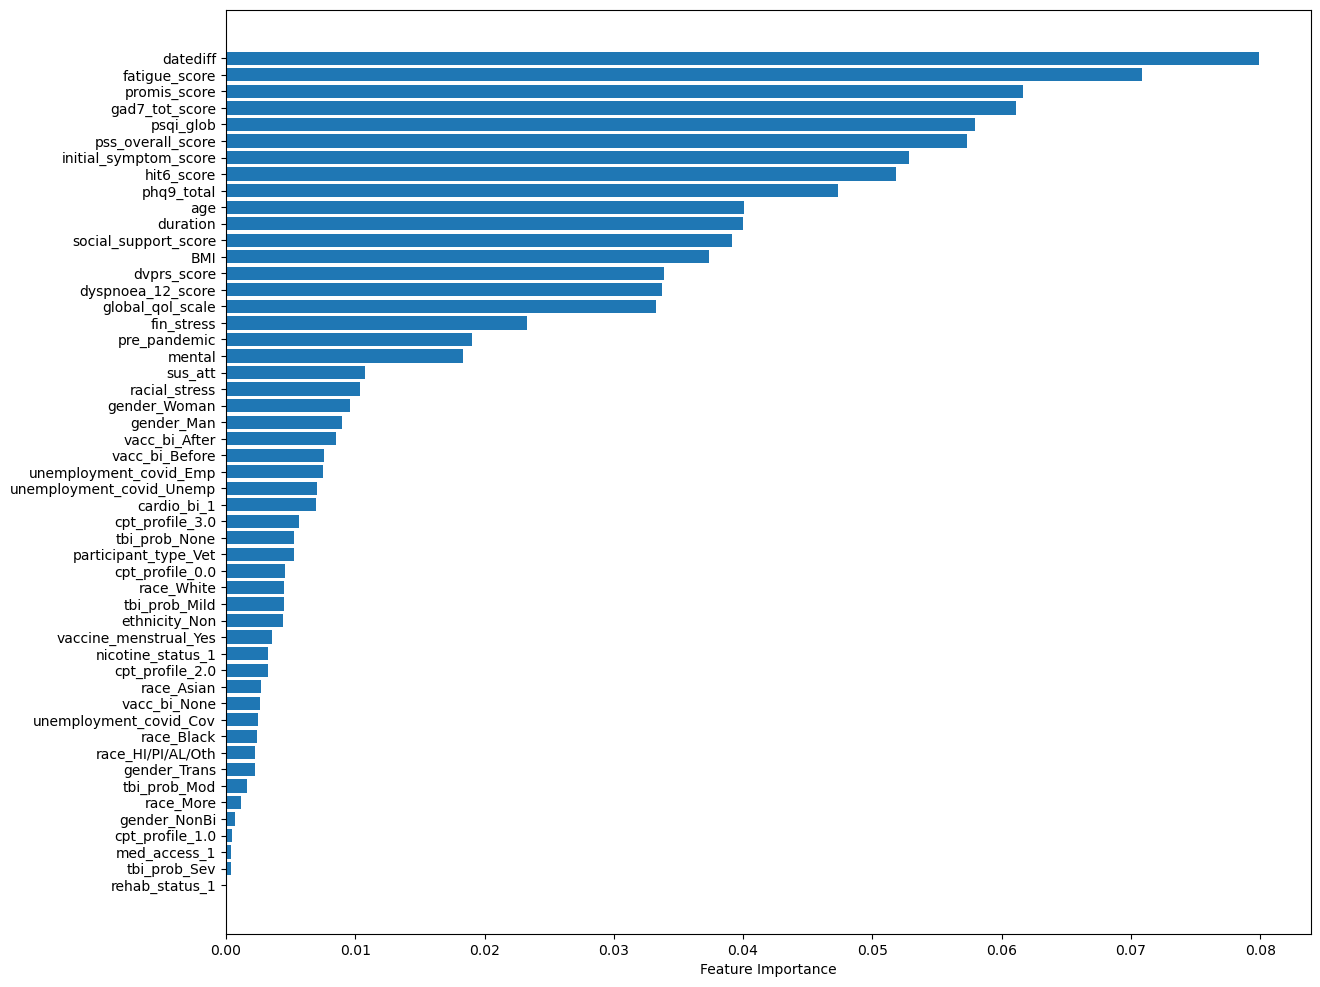

In [447]:
# Extract feature names and importances
feature_names, importances = zip(*sorted_feature_importance_pairs)

# Create a horizontal bar plot
plt.figure(figsize=(14, 12))
#plt.barh(range(len(feature_names)), importances, align='center')
#plt.yticks(range(len(feature_names)), feature_names)

plt.barh(range(len(feature_names)), importances, align='center')
plt.yticks(range(len(feature_names)), feature_names)

plt.xlabel('Feature Importance')
plt.gca().invert_yaxis()  # Invert the y-axis to show the most important features at the top
#plt.show()
plt.savefig('featimp.png')

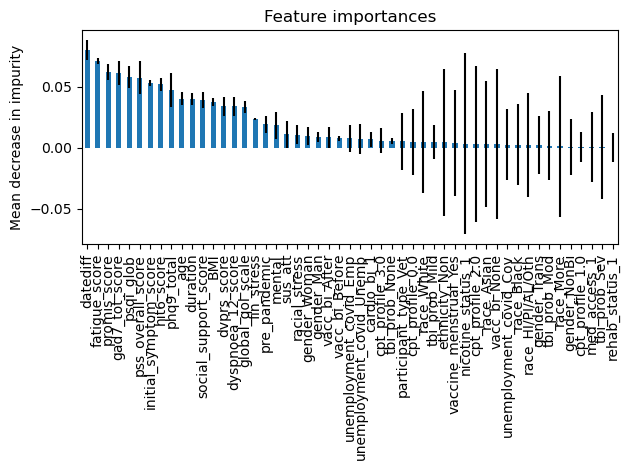

In [448]:
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)
forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()



## KNN Classifier

In [449]:
# Initialize an empty list to store KNN results
knn_results = []
for k in range (1, 11):
    # Create a K-Nearest Neighbors model with k neighbors and fit it to the balanced training data
    knn_mod = KNeighborsClassifier(n_neighbors = k).fit(X_train_under, y_train_under.values.ravel())
    # Calculate and append results to the list
    knn_results.append({
        'k': k,
        'Sens': sensitivity_score(y_test_imp.values.ravel(), knn_mod.predict(X_test_pipe)),
        'Acc': accuracy_score(y_test_imp.values.ravel(), knn_mod.predict(X_test_pipe)) 
    })
# Create a DataFrame from the list of KNN results    
knn_results = pd.DataFrame(knn_results)
warnings.filterwarnings('ignore')

In [450]:
knn_results

,k,Sens,Acc
0,1,0.707865,0.630252
1,2,0.483146,0.697479
2,3,0.696629,0.684874
3,4,0.573034,0.697479
4,5,0.775281,0.726891
5,6,0.707865,0.726891
6,7,0.786517,0.726891
7,8,0.741573,0.735294
8,9,0.775281,0.722689
9,10,0.752809,0.747899


In [481]:
# Create a K-Nearest Neighbors (KNN) classifier with 6 neighbors and fit it to the balanced training data
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train_under, y_train_under.values.ravel())

## Boosted Tree

In [452]:
# Define a grid of hyperparameters to search for in the Gradient Boosting Classifier
param_grid = {
    'max_depth' : [1,2,3,4,5],
    'learning_rate' : [0.0001, 0.001, 0.01, 0.1, 1],
    'n_estimators' : [20,21,22,23,24],
}
# Create a GridSearchCV object using GradientBoostingClassifier and the defined parameter grid
tree_search = GridSearchCV(GradientBoostingClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree_search.fit(X_train_under, y_train_under.values.ravel())
# Get the best hyperparameters found by the GridSearch
tree_search.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 24}

## Single Decision Tree

In [453]:
# Define a grid of hyperparameters to search for in the Gradient Boosting Classifier
param_grid = {
    'max_depth' : [1,2,3,4,5],
    'min_samples_leaf' : [1,2,3,4,5]
    
}
# Create a GridSearchCV object using GradientBoostingClassifier and the defined parameter grid
tree1_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=5, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree1_search.fit(X_train_under, y_train_under.values.ravel())
# Get the best hyperparameters found by the GridSearch
tree1_search.best_params_

{'max_depth': 3, 'min_samples_leaf': 4}

In [482]:
tree1 = DecisionTreeClassifier(max_depth = 3, min_samples_leaf = 4, random_state = 1).fit(X_train_under, y_train_under)

In [483]:
tree1.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.06084202, 0.        , 0.        , 0.        , 0.04011531,
       0.        , 0.45140854, 0.10505011, 0.        , 0.        ,
       0.        , 0.        , 0.10533351, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.2372505 ,
       0.        ])

In [484]:
# Get feature importance scores
importances=tree1.feature_importances_
feature_importance_pairs=list(zip(X_train_under.columns, importances))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores
fatigue_score: 0.4514
datediff: 0.2373
dyspnoea_12_score: 0.1053
gad7_tot_score: 0.1051
age: 0.0608
promis_score: 0.0401
cpt_profile_0.0: 0.0000
cpt_profile_1.0: 0.0000
cpt_profile_2.0: 0.0000
cpt_profile_3.0: 0.0000
participant_type_Vet: 0.0000
gender_Man: 0.0000
gender_NonBi: 0.0000
gender_Trans: 0.0000
gender_Woman: 0.0000
race_Asian: 0.0000
race_Black: 0.0000
race_HI/PI/AL/Oth: 0.0000
race_More: 0.0000
race_White: 0.0000
ethnicity_Non: 0.0000
nicotine_status_1: 0.0000
rehab_status_1: 0.0000
unemployment_covid_Cov: 0.0000
unemployment_covid_Emp: 0.0000
unemployment_covid_Unemp: 0.0000
vaccine_menstrual_Yes: 0.0000
tbi_prob_Mild: 0.0000
tbi_prob_Mod: 0.0000
tbi_prob_None: 0.0000
tbi_prob_Sev: 0.0000
vacc_bi_After: 0.0000
vacc_bi_Before: 0.0000
vacc_bi_None: 0.0000
cardio_bi_1: 0.0000
med_access_1: 0.0000
global_qol_scale: 0.0000
initial_symptom_score: 0.0000
pre_pandemic: 0.0000
hit6_score: 0.0000
phq9_total: 0.0000
pss_overall_score: 0.0000
social_support_s

# Model Performance on Test Set: Confusion Matrix, Accuracy Metrics, ROC Curve Comparison

## Logistic Regression with L2 Penality with 0.5 Cutoff

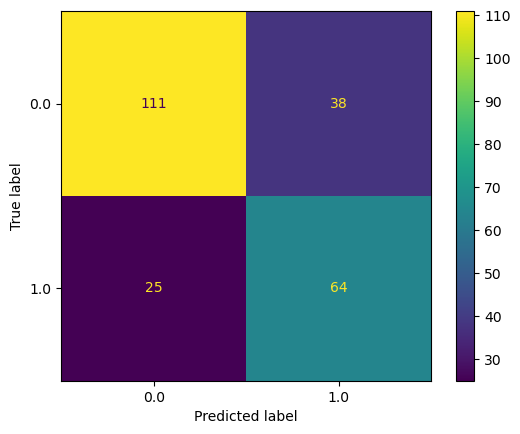

In [457]:
#Logistic Regression
log_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = log_l2_bal.predict(X_test_log), labels = log_l2_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l2_bal.classes_)
log_disp_bal.plot()
#plt.show()
plt.savefig('lr_cm.png')

In [458]:
#Sensitivity, specificity, and accuracy for log reg
logl2_sens_bal = sensitivity_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_spec_bal = specificity_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_acc_bal = accuracy_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_f1 = f1_score(y_test_imp, log_l2_bal.predict(X_test_log))
logl2_sens_bal, logl2_spec_bal, logl2_acc_bal, logl2_f1

(0.7191011235955056,
 0.7449664429530202,
 0.7352941176470589,
 0.6701570680628272)

## Logistic Regression L2 with Alternate Threshold - Lowering Below 50 Slightly Improves Performance

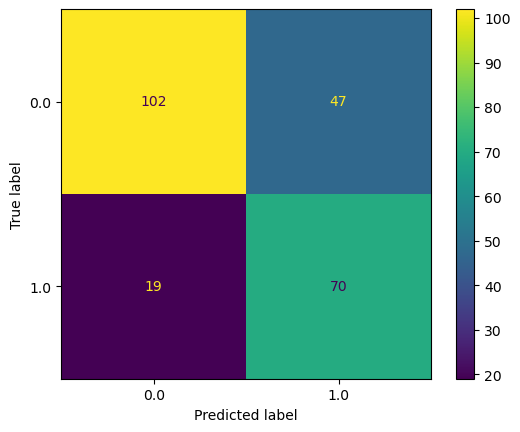

In [459]:
#Logistic Regression
log_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = (log_l2_bal.predict_proba(X_test_log)[:, 1] >= 0.45).astype(int),
                              labels = log_l2_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l2_bal.classes_)
log_disp_bal.plot()
#plt.show()
plt.savefig('lr_cm.png')

In [460]:
#Sensitivity, specificity, and accuracy for log reg
logl2T_sens_bal = sensitivity_score(y_test_imp, log_l2_bal.predict_proba(X_test_log)[:, 1] >= 0.45)
logl2T_spec_bal = specificity_score(y_test_imp, log_l2_bal.predict_proba(X_test_log)[:, 1] >= 0.45)
logl2T_acc_bal = accuracy_score(y_test_imp, log_l2_bal.predict_proba(X_test_log)[: , 1] >= 0.45)
logl2T_f1 = f1_score(y_test_imp, log_l2_bal.predict_proba(X_test_log)[:, 1] >= 0.45)
logl2T_sens_bal, logl2T_spec_bal, logl2T_acc_bal, logl2T_f1

(0.7865168539325843,
 0.6845637583892618,
 0.7226890756302521,
 0.6796116504854369)

## Logistic Regression with L1 With 0.5 Threshold

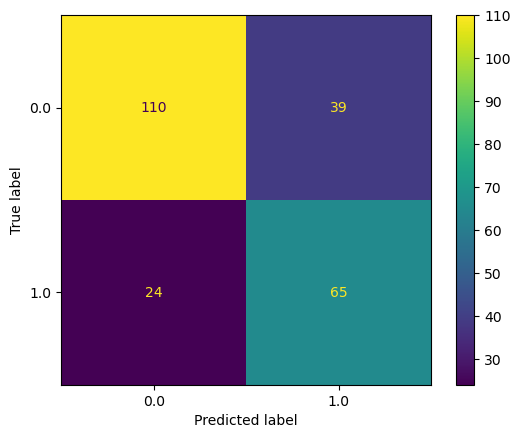

In [461]:
#Logistic Regression
log_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = log_l1_bal.predict(X_test_log),
                              labels = log_l1_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l1_bal.classes_)
log_disp_bal.plot()
#plt.show()
plt.savefig('lr_cm.png')

In [462]:
#Sensitivity, specificity, and accuracy for log reg
logl1_sens_bal = sensitivity_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_spec_bal = specificity_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_acc_bal = accuracy_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_f1 = f1_score(y_test_imp, log_l1_bal.predict(X_test_log))
logl1_sens_bal, logl1_spec_bal, logl1_acc_bal, logl1_f1

(0.7303370786516854, 0.738255033557047, 0.7352941176470589, 0.6735751295336788)

## L1 with Alternate Threshold: 0.45

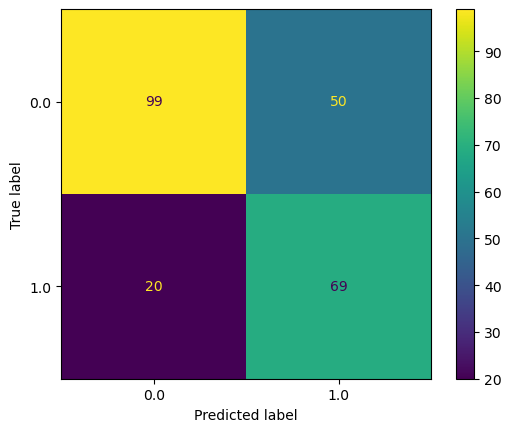

In [463]:
#Logistic Regression
log_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = (log_l1_bal.predict_proba(X_test_log)[:, 1] >= 0.45).astype(int),
                              labels = log_l1_bal.classes_)
log_disp_bal = ConfusionMatrixDisplay(confusion_matrix= log_cm_bal, display_labels=log_l1_bal.classes_)
log_disp_bal.plot()
#plt.show()
plt.savefig('lr_cm.png')

In [464]:
#Sensitivity, specificity, and accuracy for log reg
logl1T_sens_bal = sensitivity_score(y_test_imp, log_l1_bal.predict_proba(X_test_log)[:, 1] >= 0.45)
logl1T_spec_bal = specificity_score(y_test_imp, log_l1_bal.predict_proba(X_test_log)[:, 1] >= 0.45)
logl1T_acc_bal = accuracy_score(y_test_imp, log_l1_bal.predict_proba(X_test_log)[: , 1] >= 0.45)
logl1T_f1 = f1_score(y_test_imp, log_l1_bal.predict_proba(X_test_log)[:, 1] >= 0.45)
logl1T_sens_bal, logl1T_spec_bal, logl1T_acc_bal, logl1T_f1

(0.7752808988764045,
 0.6644295302013423,
 0.7058823529411765,
 0.6634615384615384)

# K-Nearest Neighbors Model Evaluation

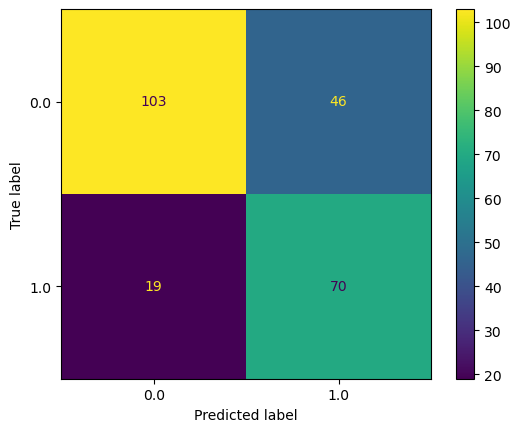

In [485]:
#KNN
# Compute the confusion matrix for KNN 
knn_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = knn.predict(X_test_pipe), labels = knn.classes_)
# Create a ConfusionMatrixDisplay object for visualization
knn_disp_bal = ConfusionMatrixDisplay(confusion_matrix= knn_cm_bal, display_labels=knn.classes_)
knn_disp_bal.plot()
warnings.filterwarnings('ignore')
plt.show()


In [486]:
#Sensitivity, specificity, and accuracy for KNN trained with balanced data
knn_sens_bal = sensitivity_score(y_test_imp, knn.predict(X_test_pipe))
knn_spec_bal = specificity_score(y_test_imp, knn.predict(X_test_pipe))
knn_acc_bal = accuracy_score(y_test_imp, knn.predict(X_test_pipe))
knn_f1 = f1_score(y_test_imp, knn.predict(X_test_pipe))
warnings.filterwarnings('ignore')
knn_sens_bal, knn_spec_bal, knn_acc_bal, knn_f1

(0.7865168539325843, 0.6912751677852349, 0.726890756302521, 0.6829268292682926)

## Boosted Decision Tree

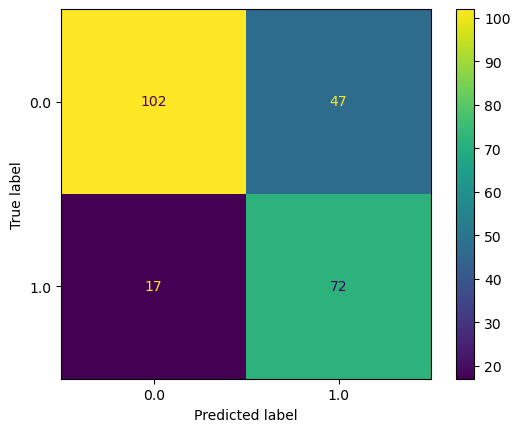

In [487]:
#Confusion matrix for tree
tree_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = tree_search.predict(X_test_pipe), labels = tree_search.classes_)
tree_disp_bal = ConfusionMatrixDisplay(confusion_matrix= tree_cm_bal, display_labels=tree_search.classes_)
tree_disp_bal.plot()
plt.show() 

In [488]:
#Sensitivity, specificity, and accuracy for decision tree with balanced training
#Much improved
tree_sens_bal = sensitivity_score(y_test_imp, tree_search.predict(X_test_pipe))
tree_spec_bal = specificity_score(y_test_imp, tree_search.predict(X_test_pipe))
tree_acc_bal = accuracy_score(y_test_imp, tree_search.predict(X_test_pipe))
tree_f1 = f1_score(y_test_imp, tree_search.predict(X_test_pipe))
tree_sens_bal, tree_spec_bal, tree_acc_bal, tree_f1

(0.8089887640449438,
 0.6845637583892618,
 0.7310924369747899,
 0.6923076923076923)

## Single Decision Tree

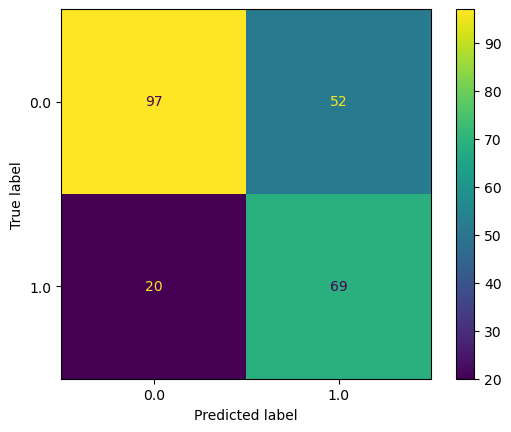

In [489]:
#Confusion matrix for tree
tree_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = tree1.predict(X_test_pipe), labels = tree1.classes_)
tree_disp_bal = ConfusionMatrixDisplay(confusion_matrix= tree_cm_bal, display_labels=tree1.classes_)
tree_disp_bal.plot()
plt.show() 

In [490]:
#Sensitivity, specificity, and accuracy for decision tree with balanced training
#Much improved
tree1_sens_bal = sensitivity_score(y_test_imp, tree1.predict(X_test_pipe))
tree1_spec_bal = specificity_score(y_test_imp, tree1.predict(X_test_pipe))
tree1_acc_bal = accuracy_score(y_test_imp, tree1.predict(X_test_pipe))
tree1_f1 = f1_score(y_test_imp, tree1.predict(X_test_pipe))
tree1_sens_bal, tree1_spec_bal, tree1_acc_bal, tree1_f1

(0.7752808988764045,
 0.6510067114093959,
 0.6974789915966386,
 0.6571428571428571)

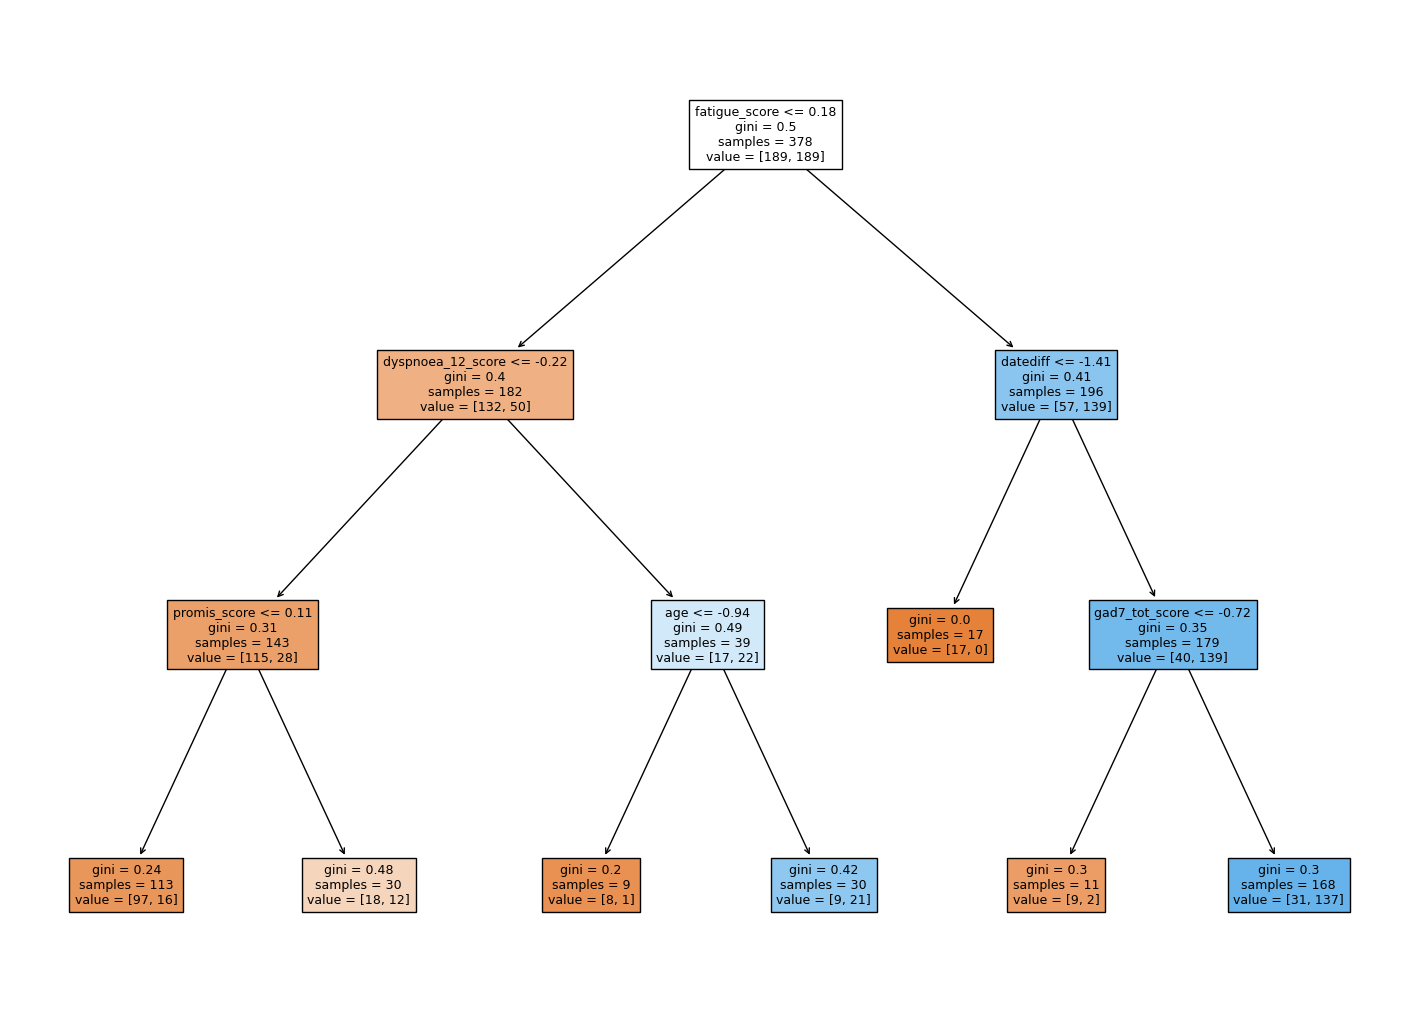

In [491]:
plt.figure(figsize = (18,13))
tree.plot_tree(tree1, feature_names = X_train_under.columns, filled = True, precision = 2, fontsize = 9)
plt.show()

## Random Forest Performance

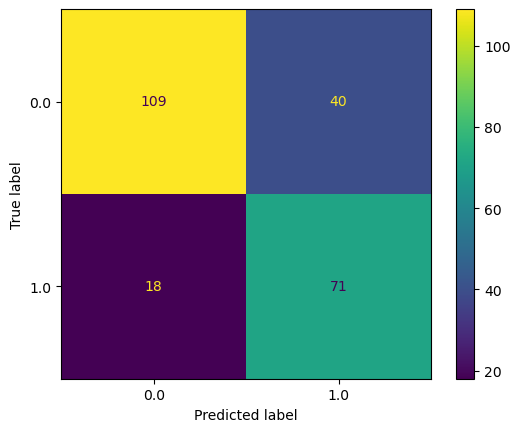

In [472]:
#RF
# Compute the confusion matrix for RF 
rf_cm_bal = confusion_matrix(y_true = y_test_imp, y_pred = random_forest.predict(X_test_pipe), labels = random_forest.classes_)
# Create a ConfusionMatrixDisplay object for visualization
rf_disp_bal = ConfusionMatrixDisplay(confusion_matrix= rf_cm_bal, display_labels=random_forest.classes_)
rf_disp_bal.plot()
warnings.filterwarnings('ignore')
#plt.show()
plt.savefig('rf_cm.png')

In [473]:
#Sensitivity, specificity, and accuracy for KNN trained with balanced datar
rf_sens_bal = sensitivity_score(y_test_imp, random_forest.predict(X_test_pipe))
rf_spec_bal = specificity_score(y_test_imp, random_forest.predict(X_test_pipe))
rf_acc_bal = accuracy_score(y_test_imp, random_forest.predict(X_test_pipe))
rf_f1 = f1_score(y_test_imp, random_forest.predict(X_test_pipe))
warnings.filterwarnings('ignore')
rf_sens_bal, rf_spec_bal, rf_acc_bal, rf_f1

(0.797752808988764, 0.7315436241610739, 0.7563025210084033, 0.71)

# Classification Test Set Performance Metrics Table

In [492]:
# Create a table to display performance metrics for different models on the validation dataset

val_performance = [
{'Model': 'Logistic Regression L2', 'Validation Sensitivity': logl2_sens_bal, 'Validation Specificity':logl2_spec_bal, 
 'Accuracy': logl2_acc_bal, 'F1 Score': logl2_f1},
    {'Model': 'Logistic Regression L2 0.45', 'Validation Sensitivity': logl2T_sens_bal, 'Validation Specificity':logl2T_spec_bal, 
 'Accuracy': logl2T_acc_bal, 'F1 Score': logl2T_f1},
    {'Model': 'Logistic Regression L1', 'Validation Sensitivity': logl1_sens_bal, 'Validation Specificity':logl1_spec_bal, 
 'Accuracy': logl1_acc_bal, 'F1 Score': logl1_f1},
    {'Model': 'Boosted Tree', 'Validation Sensitivity': tree_sens_bal, 'Validation Specificity':tree_spec_bal, 
 'Accuracy': tree_acc_bal, 'F1 Score': tree_f1},
    {'Model': 'Single Tree', 'Validation Sensitivity': tree1_sens_bal, 'Validation Specificity':tree1_spec_bal, 
 'Accuracy': tree1_acc_bal, 'F1 Score': tree1_f1},
    {'Model': 'Random Forest', 'Validation Sensitivity': rf_sens_bal, 'Validation Specificity':rf_spec_bal, 
 'Accuracy': rf_acc_bal, 'F1 Score': rf_f1},
    {'Model': 'K-Nearest Neighbors', 'Validation Sensitivity': knn_sens_bal, 'Validation Specificity':knn_spec_bal, 
 'Accuracy': knn_acc_bal, 'F1 Score': knn_f1},
    
]
# Create a formatted table using tabulate and specify the format as 'fancy_grid'
table = tabulate(val_performance, headers='keys', tablefmt='fancy_grid')
# Display the comparison table
print(table)

╒═════════════════════════════╤══════════════════════════╤══════════════════════════╤════════════╤════════════╕
│ Model                       │   Validation Sensitivity │   Validation Specificity │   Accuracy │   F1 Score │
╞═════════════════════════════╪══════════════════════════╪══════════════════════════╪════════════╪════════════╡
│ Logistic Regression L2      │                 0.719101 │                 0.744966 │   0.735294 │   0.670157 │
├─────────────────────────────┼──────────────────────────┼──────────────────────────┼────────────┼────────────┤
│ Logistic Regression L2 0.45 │                 0.786517 │                 0.684564 │   0.722689 │   0.679612 │
├─────────────────────────────┼──────────────────────────┼──────────────────────────┼────────────┼────────────┤
│ Logistic Regression L1      │                 0.730337 │                 0.738255 │   0.735294 │   0.673575 │
├─────────────────────────────┼──────────────────────────┼──────────────────────────┼────────────┼──────

## ROC Curve Comparison

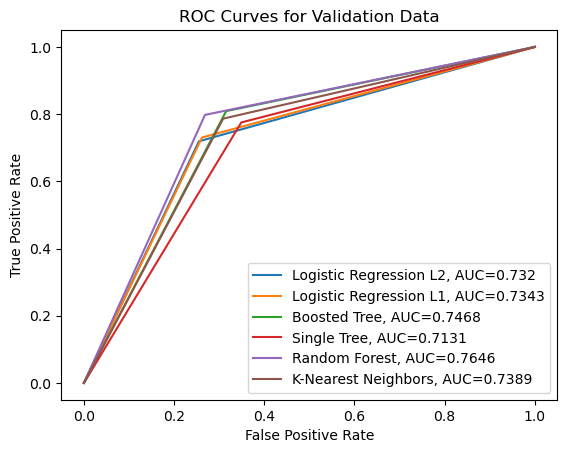

In [493]:
#ROC curve for logistic regression L2
fpr, tpr, thresholds = roc_curve(y_test_imp, log_l2_bal.predict(X_test_log))
auc_log2 = round(roc_auc_score(y_test_imp, log_l2_bal.predict(X_test_log)), 4)
plt.plot(fpr,tpr,label="Logistic Regression L2, AUC="+str(auc_log2))

#ROC Curve for logistic regression L1
fpr, tpr, thresholds = roc_curve(y_test_imp, log_l1_bal.predict(X_test_log))
auc_log1 = round(roc_auc_score(y_test_imp, log_l1_bal.predict(X_test_log)), 4)
plt.plot(fpr,tpr,label="Logistic Regression L1, AUC="+str(auc_log1))

#ROC for Boosted Tree
fpr, tpr, thresholds = roc_curve(y_test_imp, tree_search.predict(X_test_pipe))
auc_tree = round(roc_auc_score(y_test_imp, tree_search.predict(X_test_pipe)), 4)
plt.plot(fpr,tpr,label="Boosted Tree, AUC="+str(auc_tree))

#ROC for Single Tree
fpr, tpr, thresholds = roc_curve(y_test_imp, tree1.predict(X_test_pipe))
auc_tree1 = round(roc_auc_score(y_test_imp, tree1.predict(X_test_pipe)), 4)
plt.plot(fpr,tpr,label="Single Tree, AUC="+str(auc_tree1))

#ROC for Random Forest
fpr, tpr, thresholds = roc_curve(y_test_imp, random_forest.predict(X_test_pipe))
auc_rf = round(roc_auc_score(y_test_imp, random_forest.predict(X_test_pipe)), 4)
plt.plot(fpr,tpr,label="Random Forest, AUC="+str(auc_rf))

#ROC for KNN
fpr, tpr, thresholds = roc_curve(y_test_imp, knn.predict(X_test_pipe))
auc_knn = round(roc_auc_score(y_test_imp, knn.predict(X_test_pipe)), 4)
plt.plot(fpr,tpr,label="K-Nearest Neighbors, AUC="+str(auc_knn))


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate') 
plt.title('ROC Curves for Validation Data')
plt.legend()
plt.savefig('ROCs.png')

# Lift Curve for Top Models

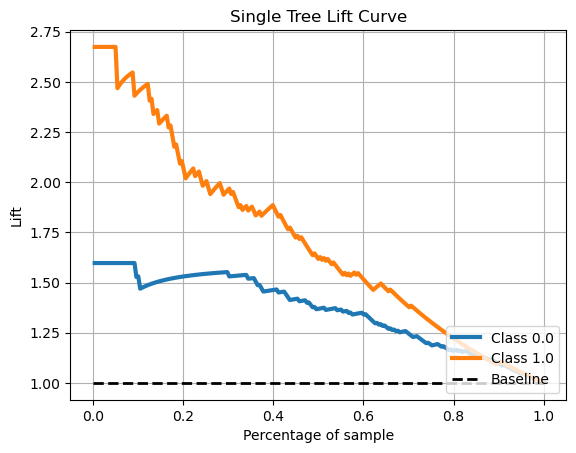

In [495]:
#Lift curve for logistic regression on test data
plot_lift_curve(y_test_imp, random_forest.predict_proba(X_test_pipe), title = 'Single Tree Lift Curve')
plt.savefig('LogLift.png')

## Variance Inflation for Classification Features: Affects Interpretability - All are OK

In [496]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X_train_pipe.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_train_pipe.values, i) 
                          for i in range(len(X_train_pipe.columns))] 
  
print(vif_data)

                     feature       VIF
0            cpt_profile_0.0       inf
1            cpt_profile_1.0       inf
2            cpt_profile_2.0       inf
3            cpt_profile_3.0       inf
4       participant_type_Vet  1.360067
5                 gender_Man       inf
6               gender_NonBi       inf
7               gender_Trans       inf
8               gender_Woman       inf
9                 race_Asian       inf
10                race_Black       inf
11         race_HI/PI/AL/Oth       inf
12                 race_More       inf
13                race_White       inf
14             ethnicity_Non  1.283272
15         nicotine_status_1  1.274422
16            rehab_status_1  1.217214
17    unemployment_covid_Cov       inf
18    unemployment_covid_Emp       inf
19  unemployment_covid_Unemp       inf
20     vaccine_menstrual_Yes  1.196064
21             tbi_prob_Mild       inf
22              tbi_prob_Mod       inf
23             tbi_prob_None       inf
24              tbi_prob_

# Explanatory Model Training: Veteran Civilian Matched Sample

## Using full matched sample for training, and maximizing training accuracy with 10-fold CV. 

### Create input and output variables

In [478]:
ex_cats = ['cpt_profile', 'participant_type',
        'gender', 'race', 'ethnicity', 
        'nicotine_status', 'rehab_status', 
        'unemployment_covid', 'vaccine_menstrual',
        'tbi_prob', 'vacc_bi', 'cardio_bi',
        'med_access']
ex_nums = ['sus_att',
           'global_qol_scale', 
        'initial_symptom_score', 
        'pre_pandemic',
        'promis_score', 
        'hit6_score', 
        'fatigue_score',
        'gad7_tot_score', 
        'phq9_total', 
        'pss_overall_score', 
        'social_support_score', 
        'dvprs_score', 
        'dyspnoea_12_score', 
        'BMI', 
        'duration', 
        'psqi_glob', 
        'mental', 
        'racial_stress', 
        'fin_stress',
          'datediff'] 
ex_all_vars = ex_cats+ex_nums

In [498]:
# Split the data into features (X) and the binary target variable (y).
X_ex = pcs_m[ex_all_vars]

#Make outcome variable into binary variable
pcs_m['pcs_diag'] = pcs_m['pcs_diag'].apply(lambda x: 1 if x == 'PASC' else 0)

#Define outcome variable
y_ex = pcs_m[['pcs_diag']]

## Impute any missing values

In [499]:
X_ex_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_ex), 
                           columns = X_ex.columns.to_list())

In [500]:
y_ex_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_ex), 
                           columns = y_ex.columns.to_list())

## Update datatypes

In [501]:
#update data types
X_ex_imp['gender'] = X_ex_imp['gender'].astype('category')
X_ex_imp['race'] = X_ex_imp['race'].astype('category')
X_ex_imp['ethnicity'] = X_ex_imp['ethnicity'].astype('category')
X_ex_imp['unemployment_covid'] = X_ex_imp['unemployment_covid'].astype('category')
X_ex_imp['tbi_prob'] = X_ex_imp['tbi_prob'].astype('category')
X_ex_imp['vacc_bi'] = X_ex_imp['vacc_bi'].astype('category')
X_ex_imp['nicotine_status'] = X_ex_imp['nicotine_status'].astype('category')
X_ex_imp['rehab_status'] = X_ex_imp['rehab_status'].astype('category')
X_ex_imp['cardio_bi'] = X_ex_imp['cardio_bi'].astype('category')
X_ex_imp['cpt_profile'] = X_ex_imp['cpt_profile'].astype('category')
X_ex_imp['participant_type'] = X_ex_imp['participant_type'].astype('category')
X_ex_imp['vaccine_menstrual'] = X_ex_imp['vaccine_menstrual'].astype('category')
X_ex_imp['med_access'] = X_ex_imp['med_access'].astype('category')

X_ex_imp['sus_att'] = X_ex_imp['sus_att'].astype('int64')
X_ex_imp['global_qol_scale'] = X_ex_imp['global_qol_scale'].astype('int64')
X_ex_imp['initial_symptom_score'] = X_ex_imp['initial_symptom_score'].astype('int64')
X_ex_imp['pre_pandemic'] = X_ex_imp['pre_pandemic'].astype('int64')
X_ex_imp['promis_score'] = X_ex_imp['promis_score'].astype('int64')
X_ex_imp['hit6_score'] = X_ex_imp['hit6_score'].astype('int64')
X_ex_imp['fatigue_score'] = X_ex_imp['fatigue_score'].astype('int64')
X_ex_imp['gad7_tot_score'] = X_ex_imp['gad7_tot_score'].astype('int64')
X_ex_imp['phq9_total'] = X_ex_imp['phq9_total'].astype('int64')
X_ex_imp['pss_overall_score'] = X_ex_imp['pss_overall_score'].astype('int64')
X_ex_imp['social_support_score'] = X_ex_imp['social_support_score'].astype('int64')
X_ex_imp['dvprs_score'] = X_ex_imp['dvprs_score'].astype('int64')
X_ex_imp['dyspnoea_12_score'] = X_ex_imp['dyspnoea_12_score'].astype('int64')
X_ex_imp['BMI'] = X_ex_imp['BMI'].astype('int64')
X_ex_imp['duration'] = X_ex_imp['duration'].astype('int64')
X_ex_imp['psqi_glob'] = X_ex_imp['psqi_glob'].astype('int64')
X_ex_imp['mental'] = X_ex_imp['mental'].astype('int64')
X_ex_imp['racial_stress'] = X_ex_imp['racial_stress'].astype('int64')
X_ex_imp['fin_stress'] = X_ex_imp['fin_stress'].astype('int64')
X_ex_imp['sus_att'] = X_ex_imp['sus_att'].astype('int64')
X_ex_imp['datediff'] = X_ex_imp['datediff'].astype('int64')

## Create transformation pipeline

In [502]:
# Create a categorical processing pipeline that uses one-hot encoding, dropping binary columns.
ex_cat_pipe = Pipeline([('encoder', OneHotEncoder(drop='if_binary'))])
# Create a numerical processing pipeline that uses skewness correction/center/scale.
ex_num_pipe = Pipeline([('skew_standardize', PowerTransformer())])

# Combine pipeline steps
ex_all_pipe = make_pipeline(ColumnTransformer([('cat', ex_cat_pipe, ex_cats), 
                                            ('num', ex_num_pipe, ex_nums)],
                                          verbose_feature_names_out=False))
# Verify steps
ex_all_pipe.named_steps

{'columntransformer': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('encoder',
                                                   OneHotEncoder(drop='if_binary'))]),
                                  ['cpt_profile', 'participant_type', 'gender',
                                   'race', 'ethnicity', 'nicotine_status',
                                   'rehab_status', 'unemployment_covid',
                                   'vaccine_menstrual', 'tbi_prob', 'vacc_bi',
                                   'cardio_bi', 'med_access']),
                                 ('num',
                                  Pipeline(steps=[('skew_standardize',
                                                   PowerTransformer())]),
                                  ['sus_att', 'global_qol_scale',
                                   'initial_symptom_score', 'pre_pandemic',
                                   'promis_score', 'hit6_score', 'fatigue_score',
        

## Fit data through pipeline

In [503]:
#Fit pipeline to resampled data
X_ex_fit = ex_all_pipe.fit(X_ex_imp)
#Get feature names out from fit and create as new list
X_ex_cols = X_ex_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_ex_pipe = pd.DataFrame(ex_all_pipe.fit_transform(X_ex_imp), columns = X_ex_cols)

## Create separate dataset for logistic regression with c-1 dummies removed

In [504]:
X_ex_log = X_ex_pipe.drop(['cpt_profile_0.0', 'gender_Man', 'race_Asian', 'unemployment_covid_Cov',
                                 'tbi_prob_None', 'vacc_bi_None'], axis = 1)

## Train L2 logistic regression and examine CV values

In [505]:
# Create Logistic Regression model with L2 regularization
log_l2_ex = LogisticRegressionCV(solver = 'lbfgs', cv = 10, random_state = 1)
# Fit the model to the training data
log_l2_ex.fit(X_ex_log, y_ex_imp.values.ravel())

LogisticRegressionCV(cv=10, random_state=1)

In [506]:
print(cross_val_score(log_l2_ex, X_ex_log, y_ex_imp, cv = 10))

[0.63333333 0.73333333 0.7        0.76666667 0.7        0.63333333
 0.73333333 0.8        0.75862069 0.79310345]


### Look at log-odds contribution of each feature

In [507]:
d = {'Feature': pd.Series(X_ex_log.columns), 'LogOdds': pd.Series(log_l2_ex.coef_[0])}
df = pd.DataFrame(data=d).reindex(d['LogOdds'].abs().sort_values(ascending=False).index)
df

,Feature,LogOdds
43,datediff,0.393924
30,fatigue_score,0.252261
28,promis_score,0.246970
37,BMI,0.223782
36,dyspnoea_12_score,0.207669
31,gad7_tot_score,0.203472
35,dvprs_score,0.196420
29,hit6_score,0.176563
20,vacc_bi_After,0.172390
26,initial_symptom_score,0.168367


## Train L1 logistic regression and examine CV values

In [508]:
# Create Logistic Regression model with L2 regularization
log_l1_ex = LogisticRegressionCV(solver = 'saga', penalty = 'l1', cv = 10, random_state = 1)
# Fit the model to the training data
log_l1_ex.fit(X_ex_log, y_ex_imp.values.ravel())

LogisticRegressionCV(cv=10, penalty='l1', random_state=1, solver='saga')

In [509]:
print(cross_val_score(log_l1_ex, X_ex_log, y_ex_imp, cv = 10))

[0.56666667 0.7        0.8        0.76666667 0.73333333 0.8
 0.8        0.8        0.65517241 0.82758621]


## Examine Log Odds contributions of each feature

In [510]:
d = {'Feature': pd.Series(X_ex_log.columns), 'LogOdds': pd.Series(log_l1_ex.coef_[0])}
df = pd.DataFrame(data=d).reindex(d['LogOdds'].abs().sort_values(ascending=False).index)
df

,Feature,LogOdds
43,datediff,0.606485
30,fatigue_score,0.413443
28,promis_score,0.340962
31,gad7_tot_score,0.280380
37,BMI,0.280002
12,nicotine_status_1,0.268368
32,phq9_total,-0.254764
36,dyspnoea_12_score,0.227290
35,dvprs_score,0.194583
26,initial_symptom_score,0.172142


## Single Decision Tree

In [511]:
# Define a grid of hyperparameters to search for in the Gradient Boosting Classifier
param_grid = {
    'max_depth' : [1,2,3,4,5],
    'min_samples_leaf' : [1,2,3,4,5]
    
}
# Create a GridSearchCV object using GradientBoostingClassifier and the defined parameter grid
tree_ex_search = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree_ex_search.fit(X_ex_pipe, y_ex_imp.values.ravel())
# Get the best hyperparameters found by the GridSearch
tree_ex_search.best_params_

{'max_depth': 4, 'min_samples_leaf': 2}

In [512]:
tree_ex = DecisionTreeClassifier(max_depth = 4, min_samples_leaf = 2, random_state = 1).fit(X_ex_pipe, y_ex_imp)

In [513]:
tree_ex.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.0324971 , 0.        , 0.09639303, 0.        , 0.        ,
       0.02031069, 0.39078181, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.15392526, 0.03096029, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.27513182])

In [514]:
# Get feature importance scores
importances=tree_ex.feature_importances_
feature_importance_pairs=list(zip(X_ex_pipe.columns, importances))

# Sort in descending order
sorted_feature_importance_pairs = sorted(feature_importance_pairs, key=lambda x: x[1], reverse=True)

# Print scores
print("Feature Importance Scores")
for feature, importance in sorted_feature_importance_pairs:
    print(f"{feature}: {importance:.4f}")

Feature Importance Scores
fatigue_score: 0.3908
datediff: 0.2751
dyspnoea_12_score: 0.1539
initial_symptom_score: 0.0964
sus_att: 0.0325
BMI: 0.0310
hit6_score: 0.0203
cpt_profile_0.0: 0.0000
cpt_profile_1.0: 0.0000
cpt_profile_2.0: 0.0000
cpt_profile_3.0: 0.0000
participant_type_Vet: 0.0000
gender_Man: 0.0000
gender_NonBi: 0.0000
gender_Trans: 0.0000
gender_Woman: 0.0000
race_Asian: 0.0000
race_Black: 0.0000
race_HI/PI/AL/Oth: 0.0000
race_More: 0.0000
race_White: 0.0000
ethnicity_Non: 0.0000
nicotine_status_1: 0.0000
rehab_status_1: 0.0000
unemployment_covid_Cov: 0.0000
unemployment_covid_Emp: 0.0000
unemployment_covid_Unemp: 0.0000
vaccine_menstrual_Yes: 0.0000
tbi_prob_Mild: 0.0000
tbi_prob_Mod: 0.0000
tbi_prob_None: 0.0000
tbi_prob_Sev: 0.0000
vacc_bi_After: 0.0000
vacc_bi_Before: 0.0000
vacc_bi_None: 0.0000
cardio_bi_1: 0.0000
med_access_1: 0.0000
global_qol_scale: 0.0000
pre_pandemic: 0.0000
promis_score: 0.0000
gad7_tot_score: 0.0000
phq9_total: 0.0000
pss_overall_score: 0.0000


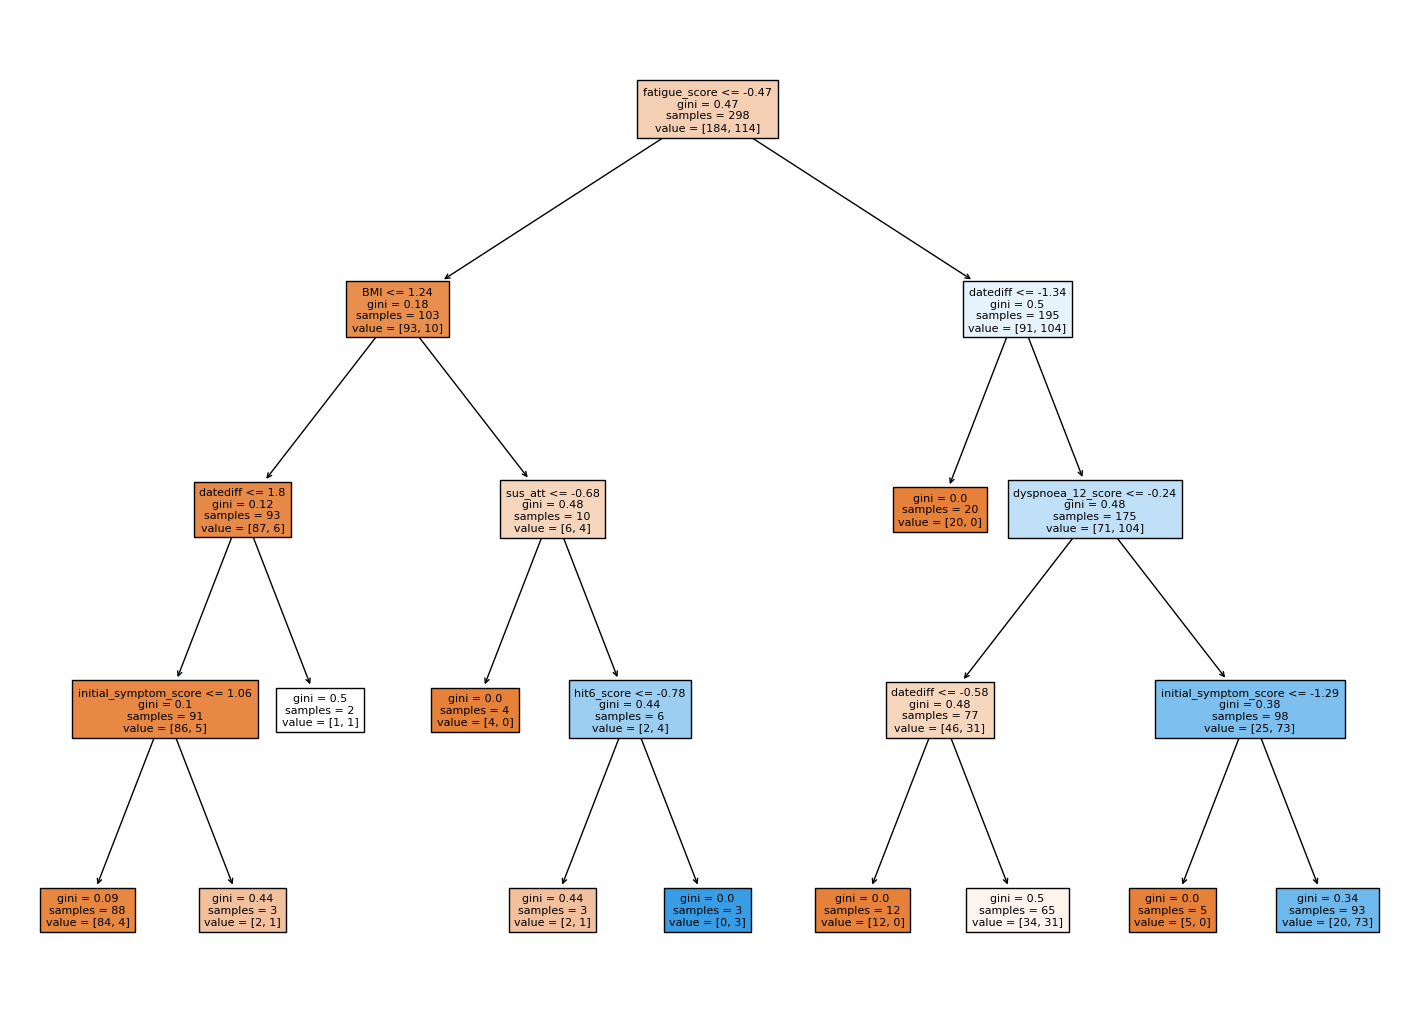

In [515]:
plt.figure(figsize = (18,13))
tree.plot_tree(tree_ex, feature_names = X_ex_pipe.columns, filled = True, precision = 2, fontsize = 8)
plt.show()

In [516]:
print(cross_val_score(tree_ex, X_ex_pipe, y_ex_imp, cv = 10))

[0.63333333 0.76666667 0.83333333 0.8        0.83333333 0.7
 0.76666667 0.6        0.65517241 0.62068966]


# Cognitive Model - Predicting Brain Fog - Regression

In [653]:
pcs_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 793 entries, 0 to 792
Data columns (total 79 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   participant_type       793 non-null    object 
 1   age                    793 non-null    int64  
 2   sex                    793 non-null    object 
 3   gender                 793 non-null    object 
 4   race                   793 non-null    object 
 5   ethnicity              793 non-null    object 
 6   racial_stress          793 non-null    int64  
 7   nicotine_status        793 non-null    int64  
 8   rehab_status           793 non-null    int64  
 9   unemployment_covid     793 non-null    object 
 10  global_qol_scale       793 non-null    int64  
 11  vaccine_menstrual      793 non-null    object 
 12  med_access             793 non-null    int64  
 13  initial_symptom_score  793 non-null    int64  
 14  pre_pandemic           793 non-null    int64  
 15  hit6_s

## Define input and output features

In [648]:
cog_cats = ['pcs_diag', 'cluster', 'vacc_bi','tbi_prob', 'participant_type', 'sex', 'gender',
           'race', 'ethnicity','nicotine_status', 'rehab_status', 'unemployment_covid', 'vaccine_menstrual',
           'med_access', 'cpt_profile']
cog_nums = ['fin_stress', 'mental', 'duration', 'age', 'racial_stress', 'global_qol_scale',
            'initial_symptom_score', 'pre_pandemic', 'pss_overall_score', 'social_support_score',
            'dvprs_score', 'BMI', 'sus_att', 'hit6_score', 'BMI', 'datediff', 
            'vs_a_rt_mn_s', 'vs_a_acc_s', 'vs_p_rt_mn_s', 'vs_p_acc_s', 'vs_a_rt_mn_l', 
            'vs_a_acc_l', 'vs_p_rt_mn_l','vs_p_acc_l', 'f_c_rt_mn', 'f_c_acc', 'f_i_rt_mn', 
            'f_i_acc', 'ds_acc', 'read_rt_sum', 'type_rt_sum', 't_r', 'hrt_m', 'hrt_s',
            'rat_e_rt_sd', 'rat_e_acc', 'rat_m_rt_sd', 'rat_m_acc', 'rat_h_rt_sd', 'rat_h_acc']
cog_all = cog_cats+cog_nums

## Split data into training and test sets

In [649]:
# Split the data into features (X) and the binary target variable (y).
X_cog = pcs_c[cog_all]

#Define outcome variable
y_cog = pcs_c[['promis_score']]

#Split data
X_cog_train, X_cog_test, y_cog_train, y_cog_test = train_test_split(X_cog, y_cog, train_size = 0.7, random_state=1)

## Use median/mode to impute any missing values. 

In [650]:
X_cog_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_cog_train), 
                           columns = X_cog_train.columns.to_list())
y_cog_train_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_cog_train), 
                           columns = y_cog_train.columns.to_list())
X_cog_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(X_cog_test), 
                           columns = X_cog_test.columns.to_list())
y_cog_test_imp = pd.DataFrame(SimpleImputer(strategy = 'most_frequent').fit_transform(y_cog_test), 
                           columns = y_cog_test.columns.to_list())

## Run training and test set through the transformation pipeline

In [651]:
# Create a categorical processing pipeline that uses one-hot encoding, dropping binary columns.
cog_cat_pipe = Pipeline([('encoder', OneHotEncoder(drop='if_binary'))])
# Create a numerical processing pipeline that uses skewness correction/center/scale.
cog_num_pipe = Pipeline([('skew_standardize', PowerTransformer())])

# Combine pipeline steps
cog_all_pipe = make_pipeline(ColumnTransformer([('cat', cog_cat_pipe, cog_cats), 
                                            ('num', cog_num_pipe, cog_nums)],
                                          verbose_feature_names_out=False))
# Verify steps
cog_all_pipe.named_steps

{'columntransformer': ColumnTransformer(transformers=[('cat',
                                  Pipeline(steps=[('encoder',
                                                   OneHotEncoder(drop='if_binary'))]),
                                  ['pcs_diag', 'cluster', 'vacc_bi', 'tbi_prob',
                                   'participant_type', 'sex', 'gender', 'race',
                                   'ethnicity', 'nicotine_status',
                                   'rehab_status', 'unemployment_covid',
                                   'vaccine_menstrual', 'med_access',
                                   'cpt_profile']),
                                 ('num',
                                  Pipeline(steps=[('skew_standardize',
                                                   PowerTr...
                                   'initial_symptom_score', 'pre_pandemic',
                                   'pss_overall_score', 'social_support_score',
                                   '

### Training

In [652]:
#Fit pipeline to resampled data
X_cog_train_fit = cog_all_pipe.fit(X_cog_train_imp)
#Get feature names out from fit and create as new list
X_cog_cols = X_cog_train_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_cog_train_pipe = pd.DataFrame(cog_all_pipe.fit_transform(X_cog_train_imp), columns = X_cog_cols)

ValueError: Selected columns, ['fin_stress', 'mental', 'duration', 'age', 'racial_stress', 'global_qol_scale', 'initial_symptom_score', 'pre_pandemic', 'pss_overall_score', 'social_support_score', 'dvprs_score', 'BMI', 'sus_att', 'hit6_score', 'BMI', 'datediff', 'vs_a_rt_mn_s', 'vs_a_acc_s', 'vs_p_rt_mn_s', 'vs_p_acc_s', 'vs_a_rt_mn_l', 'vs_a_acc_l', 'vs_p_rt_mn_l', 'vs_p_acc_l', 'f_c_rt_mn', 'f_c_acc', 'f_i_rt_mn', 'f_i_acc', 'ds_acc', 'read_rt_sum', 'type_rt_sum', 't_r', 'hrt_m', 'hrt_s', 'rat_e_rt_sd', 'rat_e_acc', 'rat_m_rt_sd', 'rat_m_acc', 'rat_h_rt_sd', 'rat_h_acc'], are not unique in dataframe

### Testing

In [581]:
#Fit pipeline to resampled data
X_cog_test_fit = cog_all_pipe.fit(X_cog_test_imp)
#Get feature names out from fit and create as new list
X_cog_cols = X_cog_test_fit.get_feature_names_out().tolist()
#Create new dataframe with transformed data, and apply feature name list as column names
X_cog_test_pipe = pd.DataFrame(cog_all_pipe.fit_transform(X_cog_test_imp), columns = X_cog_cols)

## Create datasets with c-1 dummies for linear models

In [629]:
X_cog_train_l = X_cog_train_pipe.drop(['cluster_4', 'vacc_bi_None', 'tbi_prob_None', 'gender_Man',
                                      'race_White', 'unemployment_covid_Emp'], axis = 1)
X_cog_test_l = X_cog_test_pipe.drop(['cluster_4', 'vacc_bi_None', 'tbi_prob_None', 'gender_Man',
                                      'race_White', 'unemployment_covid_Emp'], axis = 1)

## Normalize Outcome Variable for Training Only

In [587]:
y_cog_train_imp['cog_log'] = np.log(y_cog_train_imp['promis_score'])

(array([177.,  63.,  61.,  78.,  41.,  61.,  20.,  20.,  17.,  17.]),
 array([ 8. , 11.2, 14.4, 17.6, 20.8, 24. , 27.2, 30.4, 33.6, 36.8, 40. ]),
 <BarContainer object of 10 artists>)

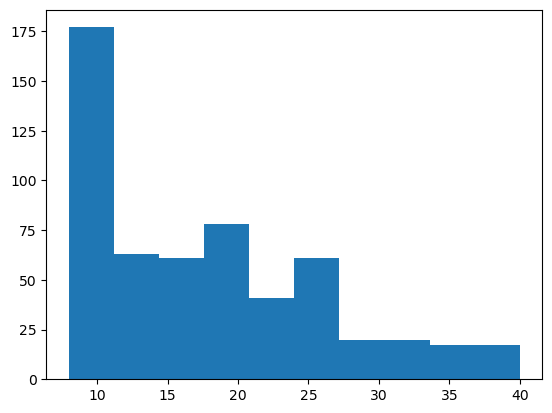

In [588]:
plt.figure()
plt.hist(y_cog_train_imp['promis_score'])

(array([135.,  42.,  19.,  65.,  40.,  95.,  48.,  46.,  35.,  30.]),
 array([2.07944154, 2.24038533, 2.40132912, 2.56227292, 2.72321671,
        2.8841605 , 3.04510429, 3.20604808, 3.36699187, 3.52793566,
        3.68887945]),
 <BarContainer object of 10 artists>)

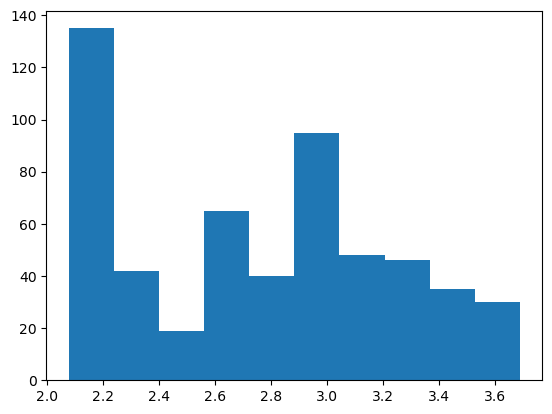

In [589]:
plt.hist(y_cog_train_imp['cog_log'])

# Model Training

## Model 1: Simple Linear Regression

In [631]:
# Training metrics
x = sm.add_constant(X_cog_train_l)

#fit linear regression model
lr = sm.OLS(y_cog_train_imp['cog_log'], x).fit()

#view model summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                cog_log   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.589
Method:                 Least Squares   F-statistic:                     10.56
Date:                Tue, 06 Feb 2024   Prob (F-statistic):           5.75e-67
Time:                        20:52:50   Log-Likelihood:                -93.749
No. Observations:                 555   AIC:                             355.5
Df Residuals:                     471   BIC:                             718.3
Df Model:                          83                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

## Model 2: Penalized Linear Regression - Ridge L2 and Lasso L1

In [ ]:
# Define a grid of hyperparameters to search for 
param_grid = {
    'max_depth' : [1,2,3,4,5],
    'min_samples_leaf' : [1,2,3,4,5],
    'criterion' : ['squared_error', 'absolute_error']
    
}
# Create a GridSearchCV object
tree_cog_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree_cog_search.fit(X_cog_train_pipe, y_cog_train_imp['cog_log'].values.ravel())
# Get the best hyperparameters found by the GridSearch
tree_cog_search.best_params_

### Lasso L1

In [591]:
l1 = LassoCV(cv=5, random_state=1)
l1.fit(X_cog_train_l, y_cog_train_imp['cog_log'])

LassoCV(cv=5, random_state=1)

In [627]:
d = {'Feature': pd.Series(X_cog_train_l.columns), 'LogOdds': pd.Series(l1.coef_)}
df = pd.DataFrame(data=d).reindex(d['LogOdds'].abs().sort_values(ascending=False).index)
df.head(50)

,Feature,LogOdds
36,pss_overall_score,0.222189
34,initial_symptom_score,0.070629
0,pcs_diag_PASC,0.069668
38,dvprs_score,0.064439
32,racial_stress,0.046386
29,mental,0.023497
79,rat_m_acc,0.018928
28,fin_stress,0.016892
78,rat_m_rt_sd,0.016477
71,b_diff,-0.015053


## Model 3: Decision Tree Regressor

In [593]:
# Define a grid of hyperparameters to search for 
param_grid = {
    'max_depth' : [1,2,3,4,5],
    'min_samples_leaf' : [1,2,3,4,5],
    'criterion' : ['squared_error', 'absolute_error']
    
}
# Create a GridSearchCV object
tree_cog_search = GridSearchCV(DecisionTreeRegressor(random_state=1), param_grid, cv=5, n_jobs=-1)
# Fit the GridSearchCV to the balanced training data to find the best hyperparameters
tree_cog_search.fit(X_cog_train_pipe, y_cog_train_imp['cog_log'].values.ravel())
# Get the best hyperparameters found by the GridSearch
tree_cog_search.best_params_

{'criterion': 'squared_error', 'max_depth': 3, 'min_samples_leaf': 1}

In [594]:
tree_cog = DecisionTreeRegressor(max_depth = 3, min_samples_leaf = 1, random_state = 1).fit(X_cog_train_pipe, y_cog_train_imp['cog_log'])



## Model 4: KNN Regressor

In [619]:
# Initialize an empty list to store KNN results
knn_results = []
for k in range (1, 20):
    # Create a K-Nearest Neighbors model with k neighbors and fit to training
    knn_mod = KNeighborsRegressor(n_neighbors = k).fit(X_cog_train_pipe, y_cog_train_imp['cog_log'].values.ravel())
    # Calculate and append results to the list
    knn_results.append({
        'k': k,
        'RMSE': mean_squared_error(y_cog_train_imp['cog_log'], np.exp(knn_mod.predict(X_cog_train_pipe)), squared = False)
    })
# Create a DataFrame from the list of KNN results    
knn_results = pd.DataFrame(knn_results)
warnings.filterwarnings('ignore')

In [620]:
knn_results

,k,RMSE
0,1,16.779433
1,2,15.468740
2,3,15.113212
3,4,14.844450
4,5,14.613679
5,6,14.320349
6,7,14.161000
7,8,13.934583
8,9,13.867566
9,10,13.765078


In [621]:
knn_cog = KNeighborsRegressor(n_neighbors = 9).fit(X_cog_train_pipe, y_cog_train_imp['cog_log'])

# Regression Model Performance: R2, Adj R2, Accuracy, RMSE

### Exponentiate The Log Output Prediction to Get Original Units

## Model 1: Simple Linear Regression

In [630]:
# Get predictions from test set
lr_y_pred = np.exp(lr.predict(X_cog_test_l))
lr_y_pred

ValueError: shapes (238,83) and (84,) not aligned: 83 (dim 1) != 84 (dim 0)

In [552]:
# RMSE for test
lr_rmse = np.round(mean_squared_error(y_cog_test_imp, lr_y_pred, squared = False), decimals = 3)
lr_rmse

13.927

In [553]:
#R2 for test
lr_r2 = r2_score(y_cog_test_imp, lr_y_pred)
lr_r2

-1.8126566296572557

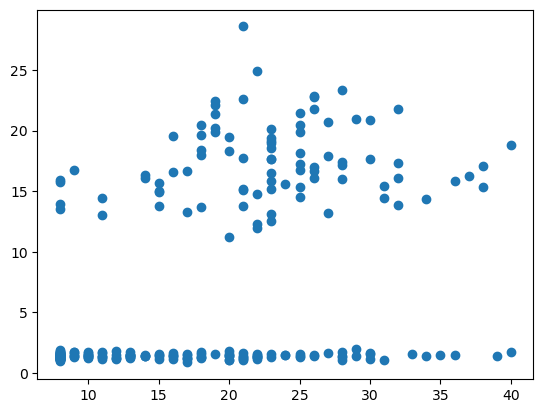

In [557]:
# Correlation plot between actual test values and predicted test values
plt.scatter(y_cog_test_imp, lr_y_pred)


## Model 2: L1 Lasso Regression

In [600]:
# Get predictions from test set
l1_y_pred = np.exp(l1.predict(X_cog_test_l))
l1_y_pred

array([16.15403143, 19.77953816, 19.96848682, 10.92527215, 11.96556086,
       14.08204759,  9.59236635, 20.34985497, 11.75349675, 21.91147613,
       18.15290565, 10.71875056, 15.01748935,  9.52478219, 17.468776  ,
       14.91414786, 22.72788247, 20.07976617, 24.01643257, 14.58318043,
        8.61875986, 14.74562473, 16.45150052, 11.43388632, 13.18295968,
       10.51143733,  8.38709329, 15.30105194, 31.00048683, 13.43998384,
       15.46965791, 13.84851674, 10.35342578, 11.00723451, 25.08811268,
       12.65505828, 11.51038692, 15.31036305, 27.53365605,  9.41279161,
       12.95554301,  9.24583843, 15.52985403, 12.70371103,  6.94299428,
       27.90221563, 23.58424024, 17.90062493, 10.00565295, 14.74912178,
       22.00040806, 22.2600275 ,  9.82656657, 33.14110209,  9.73632648,
       10.46797004, 17.16145439, 16.947422  , 20.46257428, 12.92216805,
       14.16724359, 14.93168473, 22.59882203, 11.71159183,  9.57482915,
       15.16444545, 12.30303286, 16.74082768, 15.60206249, 12.82

In [601]:
# RMSE for test
l1_rmse = np.round(mean_squared_error(y_cog_test_imp, l1_y_pred, squared = False), decimals = 3)
l1_rmse

6.052

In [602]:
#R2 for test
l1_r2 = r2_score(y_cog_test_imp, l1_y_pred)
l1_r2

0.46876341749966854

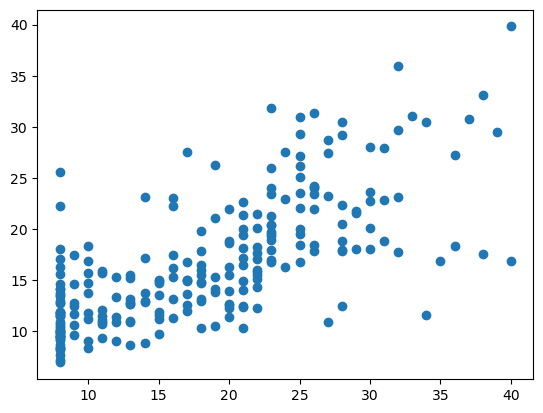

In [603]:
# Correlation plot between actual test values and predicted test values
plt.scatter(y_cog_test_imp, l1_y_pred)

## Model 3: Decision Tree Regression

In [604]:
# Get predictions from test set
tree_y_pred = np.exp(tree_cog.predict(X_cog_test_pipe))
tree_y_pred

array([16.3619487 , 25.24265165, 16.3619487 , 12.23423326, 11.2201587 ,
       12.23423326,  9.40066106, 22.37347914, 16.54784131, 16.3619487 ,
       16.3619487 ,  9.40066106, 16.3619487 , 11.2201587 , 16.54784131,
       12.23423326, 16.3619487 , 16.3619487 , 22.37347914, 16.54784131,
        9.40066106, 16.54784131, 16.3619487 , 12.23423326, 12.23423326,
       11.2201587 , 11.2201587 , 11.2201587 , 22.37347914, 16.54784131,
       16.3619487 , 12.23423326, 11.2201587 ,  9.40066106, 22.37347914,
       16.54784131, 12.23423326, 16.54784131, 25.24265165, 11.2201587 ,
       11.2201587 , 11.2201587 , 12.23423326, 12.23423326,  9.40066106,
       22.37347914, 32.10752146, 12.23423326,  9.40066106, 22.37347914,
       22.37347914, 22.37347914,  9.40066106, 32.10752146,  9.40066106,
        9.40066106, 16.3619487 , 22.37347914, 22.37347914, 12.23423326,
       16.3619487 ,  9.40066106, 22.37347914,  9.40066106,  9.40066106,
       16.54784131, 11.2201587 , 16.54784131, 16.54784131, 11.22

In [605]:
# RMSE for test
tree_rmse = np.round(mean_squared_error(y_cog_test_imp, tree_y_pred, squared = False), decimals = 3)
tree_rmse

6.648

In [606]:
#R2 for test
tree_r2 = r2_score(y_cog_test_imp, tree_y_pred)
tree_r2

0.35903004066325384

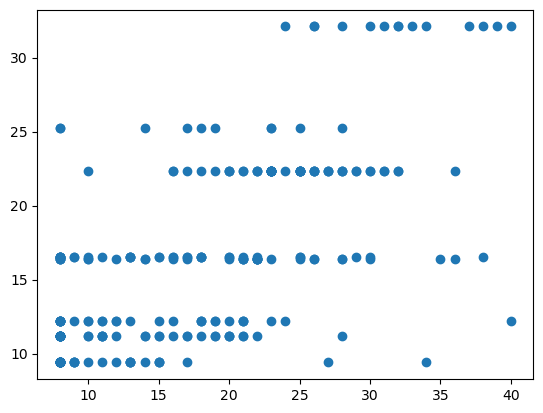

In [607]:
# Correlation plot between actual test values and predicted test values
plt.scatter(y_cog_test_imp, tree_y_pred)

## Model 4: KNN Regressor

In [622]:
# Get predictions from test set
knn_y_pred = np.exp(knn_cog.predict(X_cog_test_pipe))
knn_y_pred

array([13.34708787, 15.45021564, 14.51494384, 12.9436718 , 13.10767371,
       14.84337909, 11.34040353, 15.6365625 , 20.22049967, 21.40316431,
       14.27337453, 12.90183401, 12.8244136 , 10.52845339, 17.35535505,
       14.37837158, 17.03844511, 18.75287133, 17.2839453 , 13.30709476,
        9.11083554, 13.14736124, 15.32024448, 11.66890599, 11.00069871,
       11.19316635, 10.23778656, 14.10360517, 25.9629671 , 14.38999141,
       11.06268966, 16.32978349, 12.25354425, 12.36475658, 26.80502537,
       14.79957906, 11.00736697, 21.7970713 , 20.59516228, 13.5457152 ,
       14.35845644, 11.27320528, 17.26060709, 15.43665442,  9.77911134,
       24.65964171, 17.50334474, 13.64615811, 10.89162523, 15.09599577,
       25.10342351, 19.69913604,  9.25118563, 26.07069414, 11.79651556,
       12.01518356, 18.29279843, 15.47447746, 21.52075117, 12.70253408,
       14.91141508, 12.24028684, 20.70578345, 15.1690164 , 13.60414739,
       16.30474375, 11.01917595, 17.67994437, 14.03488952, 13.63

In [623]:
# RMSE for test
knn_rmse = np.round(mean_squared_error(y_cog_test_imp, knn_y_pred, squared = False), decimals = 3)
knn_rmse

7.068

In [624]:
#R2 for test
knn_r2 = r2_score(y_cog_test_imp, knn_y_pred)
knn_r2

0.27558099223532095

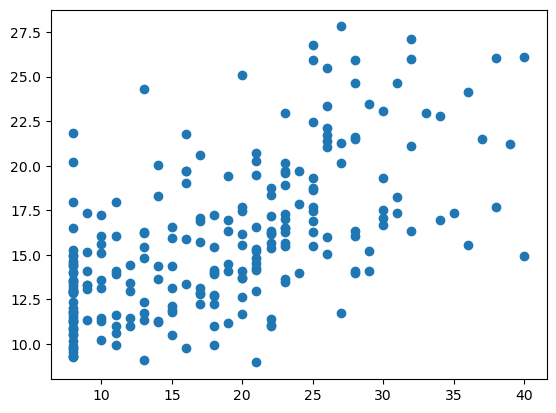

In [625]:
# Correlation plot between actual test values and predicted test values
plt.scatter(y_cog_test_imp, knn_y_pred)

## Table of Regression Performance Metrics

In [ ]:
model_data = [
    {'Model1': 'Simple Linear Regression', 'Test Accuracy': lasso_err, 'Test RMSE': lasso_err_val, 'Test R2': lasso_r2_test},
    {'Model2': 'Ridge Regression', 'Test Accuracy': ridge_err, 'Test RMSE': ridge_err_val, 'Test R2': ridge_r2_test},
    {'Model3': 'Lasso Regression', 'Test Accuracy': elastic_err, 'Test RMSE': elastic_err_val, 'Test R2': elastic_r2_test},
    {'Model4': 'Decision Tree Regression', 'Test Accuracy': l1_err, 'Test RMSE': l1_err_val, 'Test R2': l1_r2_test},
    {'Model5': 'KNN Nearest', 'Test Accuracy': l1_err, 'Test RMSE': l1_err_val, 'Test R2': l1_r2_test}
]

table = tabulate(model_data, headers='keys', tablefmt='fancy_grid')



## Check for variance inflation

In [573]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X_cog_train_pipe.columns 
  
# calculating VIF for each feature 
vif_data["VIF"] = [variance_inflation_factor(X_cog_train_pipe.values, i) 
                          for i in range(len(X_cog_train_pipe.columns))] 
  
print(vif_data)

          feature         VIF
0   pcs_diag_PASC    2.730824
1       cluster_1    1.180655
2       cluster_2    2.366155
3       cluster_3    1.370423
4       cluster_4    1.057839
5       cluster_5    1.473424
6       cluster_6    1.863901
7        datediff    1.239986
8    vs_a_rt_mn_s    6.628363
9    vs_a_rt_sd_s    2.954666
10     vs_a_acc_s    1.644732
11   vs_p_rt_mn_s    5.285724
12   vs_p_rt_sd_s    2.988509
13     vs_p_acc_s    1.491765
14   vs_a_rt_mn_l    4.314209
15   vs_a_rt_sd_l    1.624031
16     vs_a_acc_l    1.702462
17   vs_p_rt_mn_l    7.323477
18   vs_p_rt_sd_l    3.791130
19     vs_p_acc_l    1.640473
20      f_c_rt_mn   11.894173
21      f_c_rt_sd    3.814605
22        f_c_acc    1.206079
23      f_i_rt_mn   11.668674
24      f_i_rt_sd    3.946288
25        f_i_acc    1.263124
26         ds_acc    1.310174
27       ds_rt_mn    4.466178
28       ds_rt_sd    3.050222
29    read_rt_sum    2.862660
30    type_rt_sum    5.105343
31             co   27.717034
32        